# 📚 <font color='indianred'>Préparez des données pour un organisme de santé publique</font>


# <font color='DodgerBlue'> SOMMAIRE<font></a>
    
### <a href="#C1"><font color='DodgerBlue'>Etape 1. Préparation des données</a>
    
   - <a href="#C2"> A. Importation des bibliothèques nécessaires </a>
   - <a href="#C3"> B. Chargement des données </a>
    
### <a href="#C4"><font color='DodgerBlue'>Etape 2. Description du jeu de données </a>
    
### <a href="#C5"><font color='DodgerBlue'>Etape 3. Nettoyage des données </a>
       
#### <a href="#C6"><font color='RoyalBlue'>1. Analyse du taux de Remplissage des Données</a>
      
#### <a href="#C7"><font color='RoyalBlue'>2. Nettoyage des données par"Colonne"(features)</a>
    
  - <a href="#C8">2.1 Suppressions des colonnes entièrement vides</a>
  - <a href="#C9">2.2 Conversion du format des dates</a>
  - <a href="#C10">2.3 Suppression des colonnes peu renseignés</a>
  - <a href="#C11">2.4 Traitement de la colonne "countries"</a>
  - <a href="#C12">2.5 Identification des variables pertinentes</a>
    
#### <a href="#C13"><font color='RoyalBlue'>3. Nettoyage des données par "Produit"(lignes)</a>
    
  - <a href="#C14">3.1 Analyse et traitements des données redondantes</a> 
  - <a href="#C15">3.2 Suppression des colonnes peu renseignés</a>
  - <a href="#C16">3.3 Analyse et traitements des données aberrantes</a>
  - <a href="#C17">3.4 Analyse et traitements des données manquantes (hors "nutriscore_score" et "nutriscore_grade")</a>
  - <a href="#C18">A. Régression linéaire</a>
  - <a href="#C19">B. KNN Regressor</a>
  - <a href="#C20">A. KNN Classifier</a>
    

### <a href="#C21"><font color='DodgerBlue'> 4. Exploration et Analyse des données</a>
    
  - <a href="#C22"> A. Analyse univariée</a>
  - <a href="#C23"> B. Analyse bivariée</a>
  - <a href="#C24"> C. Analyse multivariée</a>
  - <a href="#C25"> D. Analyse statistiques</a>
    
### <a href="#C26"><font color='DodgerBlue'> 5. RGPD</a>
    
### <a href="#C27"><font color='DodgerBlue'> 5. Conclusion</a>

<font color='indianred'>**Santé publique France**<font></a>
   
- L'Agence nationale de santé publique en France est à la recherche d'innovations en matière d'applications dédiées à l'alimentation et lance donc un appel à projets dans ce domaine.
    
<font color='indianred'>**Contexte**<font></a>
    
- La qualité nutritionnelle des produits alimentaires est une préoccupation majeure pour la santé publique. 
- Santé publique France cherche à améliorer la base de données **Open Food Facts**, un projet open source qui recueille des informations sur les produits alimentaires du monde entier, pour faciliter l'accès à des données fiables sur la qualité nutritionnelle des aliments.
    
<font color='indianred'>**Problématique**<fornt></a>

- La saisie manuelle des informations produit dans la base de données Open Food Facts peut conduire à des erreurs de saisie et à des valeurs manquantes, limitant la fiabilité et l'utilité de la base de données.
- La difficulté principale est que remplir la base de données d'Open Food Facts est compliqué et peut mener à des erreurs ou à l'absence d'informations importantes.

<font color='indianred'>**Mission**<fornt></a>
     
- Notre entreprise est sollicitée pour développer un système de suggestion ou d’auto-complétion afin d'aider les utilisateurs à remplir plus efficacement la base de données Open Food Facts, en commençant par une phase de nettoyage et d'exploration des données existantes.
    
<font color='indianred'>**Objectif**<fornt></a>
    
- L'objectif de ce projet est de nettoyer et d'explorer le jeu de données Open Food Facts pour évaluer la faisabilité d'un système de suggestion de valeurs manquantes pour les champs de données.   
     
<font color='indianred'>**Nettoyage des données**<fornt></a>

- lire les définitions des variables,
- filtrer le jeu de données,
- traiter les valeurs aberrantes,
- traiter les valeurs manquantes. 

## <a name="C1"><font color='RoyalBlue'>**Étape 1 : Préparation des données**<font></a> 

## <a name="C2"><font color='DodgerBlue'>**A. Importation des bibliothèques nécessaires**</a>

In [755]:
# Import des librairies python spécialisées dans le Jupyter Notebook
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import math
import warnings

## <a name="C3"><font color='DodgerBlue'>**B. Chargement des données**</a>

In [756]:
#Import du csv
data=pd.read_csv("fr.openfoodfacts.org.products.csv", sep='\t',low_memory=False ,encoding='utf-8')

## <a name="C4"><font color='RoyalBlue'>**Étape 2 : Description du jeu de données**<font></a>

- **Le jeu de données Open Food Facts contient une multitude d'informations sur les produits alimentaires, incluant leurs compositions nutritionnelles, leurs ingrédients, leur packaging, et bien plus.** 
- **Les données sont structurées avec des champs variés, allant des informations générales sur le produit à des données spécifiques sur les nutriments pour 100g ou par portion, et des informations sur l'empreinte carbone.**

- **Les données séparées en 4 sections :**

- Les informations générales sur la fiche du produit : nom, date de modification, etc.
- Un ensemble de tags : catégorie du produit, localisation, origine, etc.
- Les ingrédients composant les produits et leurs additifs éventuels.
- Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit, ainsi que le Nutri-Score.

In [757]:
#Résumé des données brutes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [758]:
# Taille : nombre de lignes/colonnes
nRow, nCol = data.shape
print(f'Le jeu de données contient {nRow} lignes et {nCol} colonnes.')

Le jeu de données contient 320772 lignes et 162 colonnes.


In [759]:
#Afficher les premières lignes
data.head(3)

code                                                url  \
0  0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
1  0000000004530  http://world-fr.openfoodfacts.org/produit/0000...   
2  0000000004559  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   

  generic_name quantity  ... ph_100g fruits-vegetables-nuts_100g  \
0          NaN      1kg  ...     NaN                         NaN   
1          NaN      NaN  ...     NaN                         NaN   
2          NaN      NaN  ...     NaN                         NaN   

  collagen-meat-protein-ratio_100g cocoa_100g chlorophyl_100g  \
0                              NaN        NaN             NaN   
1                              NaN        NaN             NaN   
2                              NaN        NaN             NaN   

  carbon-footprint_100g nutrition-score-fr_100g nutrition-score-uk_100g  \
0                   NaN                     NaN                     NaN   
1                   NaN                    14.0                    14.0   
2                   NaN                     0.0                     0.0   

  glycemic-index_100g water-hardness_100g  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  

[3 rows x 162 columns]

<font color='indianred'>**Définition d'une fonction pour évaluer la qualité des données**</a> 

In [760]:
def decrire_dataframe(df: pd.DataFrame):
    """
    Retourner un dataframe avec des informations sur les colonnes d'un dataframe
    """
    desc = df.columns.to_frame(name="column").set_index('column') #construire le dataframe résultats
    desc['count'] = df.notnull().sum() #count de values non nulls
    desc['unique'] = df.nunique() # nombre de values unique
    desc['dtype'] = df.dtypes # type de données dans chque colonne
    desc['count_null']=df.isna().sum() #count de valeurs nulls
    desc['null%']=round((df.isna().sum()/df.shape[0]*100),2)
    desc['duplicated']=df.duplicated(keep=False).sum() # nombre de valeurs en doubles
    return desc

#Vérifier l'unicité de la clé primaire
#Creation d'une fonction qui teste l'unicité d'une colonne  

def cle_primaire(df,col):
    if len(df)==len(df[col].unique()):
        print('La variable', col, 'est une clé primaire')
    else: 
        print('La variable',col, 'n\'est pas une clé primaire')

def is_zero(cell_value, color='pink'):
    """
    style pour souligné une valeur
    example use:
    df.style.applymap(is_zero,subset=["my_col"],color='red')
    """
    return f'background-color: {color};' if cell_value == 0 else None

In [761]:
#Appel à la fonction
(decrire_dataframe(data).reset_index().style
    .bar(axis='index', subset=['count'], color='green')
    .applymap(is_zero, subset=['count', 'unique'], color='pink'))

In [762]:
#Vérifier l'unicité de la clé primaire
cle_primaire(data,'code')
print ("Nombre de valeurs uniques de la colonne Country Code = ",data["code"].nunique())

La variable code n'est pas une clé primaire
Nombre de valeurs uniques de la colonne Country Code =  320749


### <font color='indianred'>Bilan sur le jeu de données "fr.openfoodfacts.org.products.csv"</a>

- **Le jeu de données data contient des informations nutritionnelles sur divers produits alimentaires .**
- **Taille: le fichier data presente 320772 lignes et 162 colonnes**
- **Certaines colonnes sont en float et contiennent des dates (années) : à transformer.**
- **16 colonnes totalement vide à supprimer.**
- **Beaucoup de valeurs NaN.**
- **Pas de doublons**

## <a name="C5"><font color='RoyalBlue'>**Étape 3 : Nettoyage des données**<font></a> 

**<font color='indianred'>Le nettoyage des données implique plusieurs étapes cruciales pour assurer la qualité.**

<font color='indianred'>**Le processus de nettoyage se divise en deux actions :**

- Sélection et nettoyage des colonnes (features).
- Filtrage et nettoyage des lignes (produits).

### <a name="C6"><font color='DodgerBlue'>**1. Analyse du Taux de Remplissage des Données**</a>

In [763]:
# Calculer le taux moyen de valeurs manquantes dans le DataFrame
taux_nan = data.isna().mean()
taux_nan_moyen = taux_nan.mean()

# Afficher le taux de valeurs manquantes
print(f'Le taux de valeurs manquantes dans le DataFrame data est de {1-taux_nan_moyen:.2%}')

Le taux de valeurs manquantes dans le DataFrame data est de 23.78%


- **Evaluation de la qualité des données :**
- En termes de qualité des données, **un taux de remplissage de 76.22%** est assez élevé, ce qui indique que la majorité des données sont présentes

In [764]:
# Calcul du pourcentage de valeurs non manquantes pour chaque colonne
data_cols = (data.notnull().sum() / len(data)).sort_values(ascending=False)*100
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data_cols)

last_modified_t                               100.000000
last_modified_datetime                        100.000000
creator                                        99.999377
created_t                                      99.999065
created_datetime                               99.997194
code                                           99.992830
url                                            99.992830
states_fr                                      99.985660
states_tags                                    99.985660
states                                         99.985660
countries                                      99.912711
countries_fr                                   99.912711
countries_tags                                 99.912711
product_name                                   94.462734
brands                                         91.142618
brands_tags                                    91.140124
energy_100g                                    81.401432
proteins_100g                  

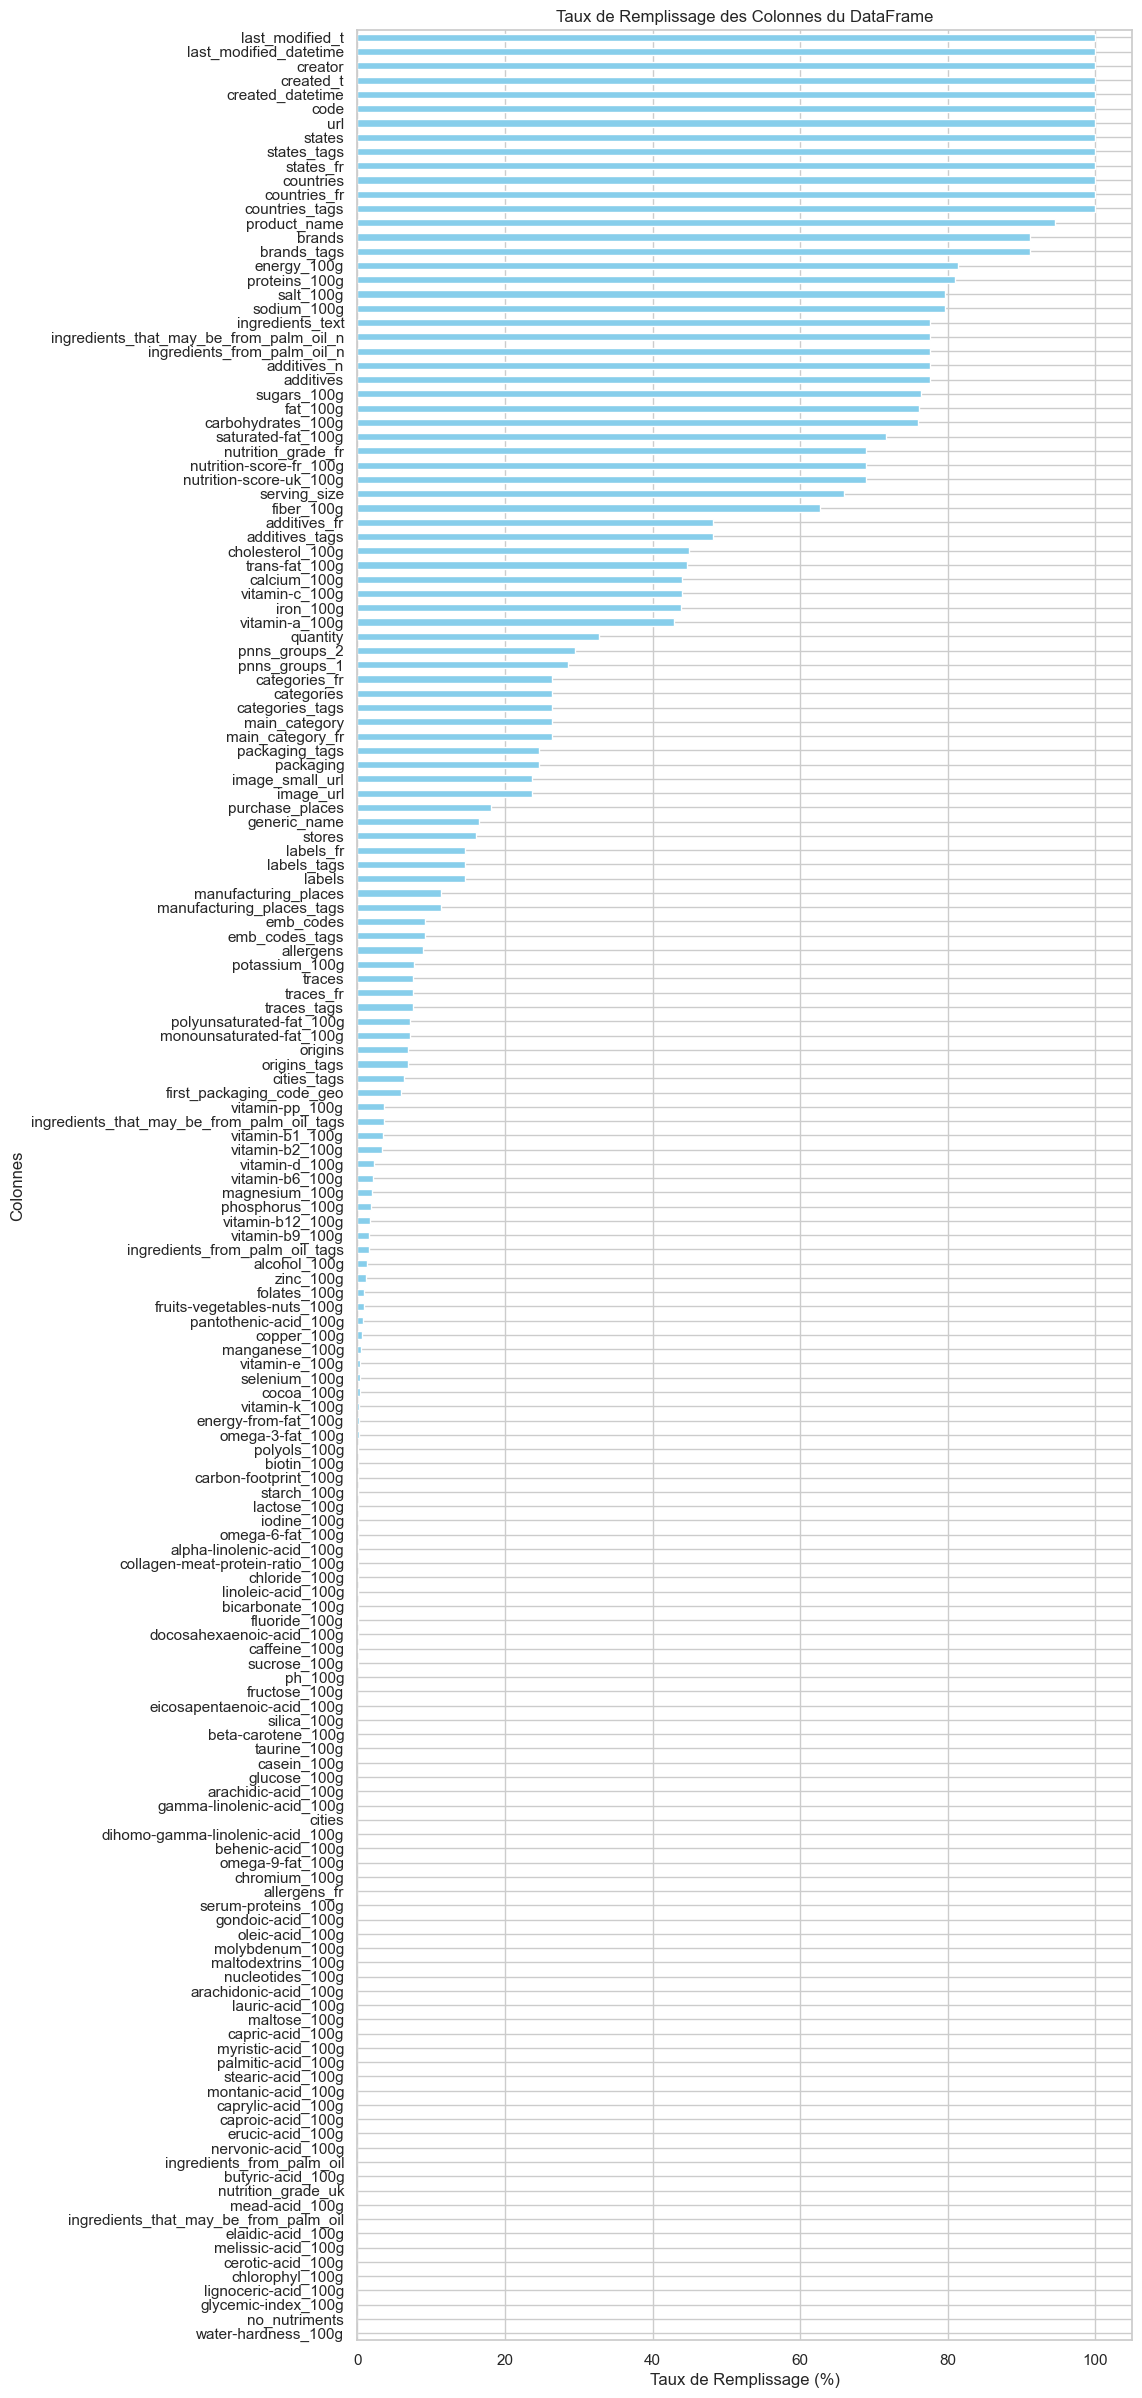

In [765]:
sns.set(style="whitegrid")
# Création du graphique à barres
plt.figure(figsize=(10,30))
data_cols.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Taux de Remplissage (%)')
plt.ylabel('Colonnes')
plt.title('Taux de Remplissage des Colonnes du DataFrame')
plt.show()

- Ce graphique nous permet de visualiser le taux de remplissage de chaque colonne de notre DataFrame pandas, permet de détecter rapidement les colonnes qui sont incomplètement remplies et qui peuvent nécessiter une attention particulière lors du nettoyage des données.

### <a name="C7"><font color='DodgerBlue'>2. Nettoyage des données par "Colonne"(features)</a>

### <a name="C8"><font color='Blue'>2.1  Suppressions des colonnes entièrement vides</a>

- <font color='indianred'>**Nous constatons qu'il y a de nombreuses colonnes quasiment vides.**
- <font color='indianred'>**Ces colonnes correspondent à des informations qui ne sont pas souvent mentionnées sur les étiquettes nutritionnelles des produits.**

**<font color='indianred'>A titre d'exemple:**

- glycemic-index_100g
- chlorophyl_100g 
- water-hardness_100g

In [766]:
#fonction qui compte, supprime les colonnes vides 
def colonnes_vides(df): 
    l=[col for col in data.columns if data[col].isnull().all()]
    print('Nombre de colonnes vides =',len(l))
    for colonnes_vides in l:
       data.pop(colonnes_vides)
    print(data.shape)

In [767]:
#utilisation de la fonction qui compte et supprime les colonnes vides
colonnes_vides(data)

Nombre de colonnes vides = 16
(320772, 146)


In [768]:
# Nom des colonnes
data.columns.to_list()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_fr',


### <a name="C9"><font color='Blue'>2.2 Conversion du format des dates</a>

- **Conversion des colonnes 'created_t' et 'last_modified_t' en datetime puis les reformater au format AAAAMMJJ pour un tri simplifié.**

In [769]:
# Convertissez les colonnes en datetime, avec 'coerce' pour les erreurs
data['created_t'] = pd.to_datetime(data['created_t'], unit='s', errors='coerce')
data['last_modified_t'] = pd.to_datetime(data['last_modified_t'], unit='s', errors='coerce')

# Formattez les colonnes datetime en chaîne de caractères au format souhaité
# Notez que cela va ignorer les valeurs NaT
data['created_t'] = data['created_t'].dt.strftime('%Y%m%d')
data['last_modified_t'] = data['last_modified_t'].dt.strftime('%Y%m%d')

# Si vous souhaitez éliminer les lignes où les conversions ont échoué
data = data.dropna(subset=['created_t', 'last_modified_t'])

In [770]:
# Suppression des colonnes en double
data.drop(columns=['created_datetime', 'last_modified_datetime'], inplace=True, errors='ignore')
data.head()

code                                                url  \
0  0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
1  0000000004530  http://world-fr.openfoodfacts.org/produit/0000...   
2  0000000004559  http://world-fr.openfoodfacts.org/produit/0000...   
3  0000000016087  http://world-fr.openfoodfacts.org/produit/0000...   
4  0000000016094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator created_t last_modified_t  \
0  openfoodfacts-contributors  20160917        20160917   
1             usda-ndb-import  20170309        20170309   
2             usda-ndb-import  20170309        20170309   
3             usda-ndb-import  20170309        20170309   
4             usda-ndb-import  20170309        20170309   

                     product_name generic_name quantity packaging  \
0              Farine de blé noir          NaN      1kg       NaN   
1  Banana Chips Sweetened (Whole)          NaN      NaN       NaN   
2                         Peanuts          NaN      NaN       NaN   
3          Organic Salted Nut Mix          NaN      NaN       NaN   
4                 Organic Polenta          NaN      NaN       NaN   

  packaging_tags  ... iodine_100g caffeine_100g taurine_100g ph_100g  \
0            NaN  ...         NaN           NaN          NaN     NaN   
1            NaN  ...         NaN           NaN          NaN     NaN   
2            NaN  ...         NaN           NaN          NaN     NaN   
3            NaN  ...         NaN           NaN          NaN     NaN   
4            NaN  ...         NaN           NaN          NaN     NaN   

  fruits-vegetables-nuts_100g collagen-meat-protein-ratio_100g cocoa_100g  \
0                         NaN                              NaN        NaN   
1                         NaN                              NaN        NaN   
2                         NaN                              NaN        NaN   
3                         NaN                              NaN        NaN   
4                         NaN                              NaN        NaN   

  carbon-footprint_100g nutrition-score-fr_100g nutrition-score-uk_100g  
0                   NaN                     NaN                     NaN  
1                   NaN                    14.0                    14.0  
2                   NaN                     0.0                     0.0  
3                   NaN                    12.0                    12.0  
4                   NaN                     NaN                     NaN  

[5 rows x 144 columns]

### <a name="C10"><font color='Blue'>2.3 Suppression des colonnes  peu renseignés</a>

In [771]:
# Obtenez les noms des colonnes à supprimer où le taux de remplissage est inférieur à 0.02
columns_to_drop = data_cols[data_cols < 0.02].index

# Filtrez les noms des colonnes pour ne garder que ceux qui existent dans 'data'
columns_to_drop = [column for column in columns_to_drop if column in data.columns]

# Supprimez les colonnes
data.drop(columns=columns_to_drop, inplace=True)

# Affichez les premières lignes du DataFrame
data.head()

code                                                url  \
0  0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
1  0000000004530  http://world-fr.openfoodfacts.org/produit/0000...   
2  0000000004559  http://world-fr.openfoodfacts.org/produit/0000...   
3  0000000016087  http://world-fr.openfoodfacts.org/produit/0000...   
4  0000000016094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator created_t last_modified_t  \
0  openfoodfacts-contributors  20160917        20160917   
1             usda-ndb-import  20170309        20170309   
2             usda-ndb-import  20170309        20170309   
3             usda-ndb-import  20170309        20170309   
4             usda-ndb-import  20170309        20170309   

                     product_name generic_name quantity packaging  \
0              Farine de blé noir          NaN      1kg       NaN   
1  Banana Chips Sweetened (Whole)          NaN      NaN       NaN   
2                         Peanuts          NaN      NaN       NaN   
3          Organic Salted Nut Mix          NaN      NaN       NaN   
4                 Organic Polenta          NaN      NaN       NaN   

  packaging_tags  ... fluoride_100g selenium_100g iodine_100g caffeine_100g  \
0            NaN  ...           NaN           NaN         NaN           NaN   
1            NaN  ...           NaN           NaN         NaN           NaN   
2            NaN  ...           NaN           NaN         NaN           NaN   
3            NaN  ...           NaN           NaN         NaN           NaN   
4            NaN  ...           NaN           NaN         NaN           NaN   

  fruits-vegetables-nuts_100g collagen-meat-protein-ratio_100g cocoa_100g  \
0                         NaN                              NaN        NaN   
1                         NaN                              NaN        NaN   
2                         NaN                              NaN        NaN   
3                         NaN                              NaN        NaN   
4                         NaN                              NaN        NaN   

  carbon-footprint_100g nutrition-score-fr_100g nutrition-score-uk_100g  
0                   NaN                     NaN                     NaN  
1                   NaN                    14.0                    14.0  
2                   NaN                     0.0                     0.0  
3                   NaN                    12.0                    12.0  
4                   NaN                     NaN                     NaN  

[5 rows x 113 columns]

In [772]:
# Calculez les taux de remplissage pour chaque colonne du DataFrame 'data'
data_cols1 = data.notnull().mean()
data_cols1

code                                1.000000
url                                 1.000000
creator                             0.999994
created_t                           1.000000
last_modified_t                     1.000000
                                      ...   
collagen-meat-protein-ratio_100g    0.000514
cocoa_100g                          0.002956
carbon-footprint_100g               0.000836
nutrition-score-fr_100g             0.689667
nutrition-score-uk_100g             0.689667
Length: 113, dtype: float64

In [773]:
# Trier le taux de remplissage par ordre décroissant
taux_remplissage = (data.notnull().sum()/len(data)).sort_values(ascending=False)
taux_remplissage

code                         1.000000
created_t                    1.000000
last_modified_t              1.000000
url                          1.000000
creator                      0.999994
                               ...   
bicarbonate_100g             0.000253
fluoride_100g                0.000246
caffeine_100g                0.000243
sucrose_100g                 0.000224
docosahexaenoic-acid_100g    0.000171
Length: 113, dtype: float64

### <a name="C11"><font color='Blue'>2.4 Traitement de la colonne "countries</a>

In [774]:
# Remplacer 'en:' par une chaîne vide '' dans la colonne 'countries'

data['countries'] = data['countries'].str.replace('en:', '', regex=False)
# Conserver uniquement les lignes où la colonne 'countries' a des valeurs plus longues que 3 caractères
data = data[data['countries'].str.len() > 3]

### <a name="C12"><font color='Blue'>2.5 Identification des variables pertinentes</a>

Pour le projet de nettoyage et d'exploration de données d'Open Food Facts pour Santé publique France, voici quelques recommandations pour choisir les variables pertinentes à conserver pour l'analyse, en tenant compte des critères et des étapes du projet énoncés :

- **Variables indispensables** :Je décide de garder les variables essentielles pour toute analyse nutritionnelle, telles que **"product_name","brands", "energy_100g", "proteins_100g", "fat_100g", "carbohydrates_100g", "sugars_100g", "salt_100g", et "fiber_100g".**
- **Ces variables sont cruciales pour évaluer la qualité nutritionnelle des produits.**

**Variables pour l'auto-complétion :** Pour développer un système d'auto-complétion, les variables avec des données complètes ou presque complètes comme **"created_t", "last_modified_t"**, et "last_modified_datetime" sont utiles, car elles peuvent aider à établir des modèles de remplissage des valeurs manquantes.

**Variables pour l'analyse statistique**:Les variables **"nutrition_grade_fr", "nutrition-score-fr_100g", et "nutrition-score-uk_100g"** sont importantes pour toute analyse statistique univariée ou multivariée concernant la qualité nutritionnelle.
- **Les catégories de produits ("pnns_groups_1" et"pnns_groups_2") peuvent fournir un contexte précieux pour l'analyse.**

In [775]:
#filtrer les colonnes qui contiennent des mesures nutritionnelles pour 100 grammes de produit
cols_nutriments = data.columns[data.columns.str.endswith('_100g')]
cols_nutriments

Index(['energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g',
       'monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
       'omega-3-fat_100g', 'alpha-linolenic-acid_100g',
       'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g',
       'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'sucrose_100g', 'lactose_100g', 'starch_100g',
       'polyols_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'alcohol_100g', 'vitamin-a_100g', 'vitamin-d_100g',
       'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g',
       'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g',
       'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g', 'biotin_100g',
       'pantothenic-acid_100g', 'bicarbonate_100g', 'potassium_100g',
       'chloride_100g', 'calcium_100g', 'phosphorus_100g', 'iron_100g',
       'magnesium_100g', 'zinc_100g', 'copper_100g', 'manganese_100g',
       'fluo

In [776]:
#Sélectionnez les colonnes utiles et excluez celles non pertinentes.
# Liste des colonnes à conserver pour une analyse nutritionnelle de base
colonnes_utiles = [
    'code','product_name','categories','countries','energy_100g','proteins_100g','fat_100g','saturated-fat_100g',
    'carbohydrates_100g', 'sugars_100g','fiber_100g', 'salt_100g', 'sodium_100g',                                                  
     'calcium_100g','nutrition-score-fr_100g', 'nutrition-score-uk_100g','nutrition_grade_fr','created_t','last_modified_t','pnns_groups_1','pnns_groups_2',
]

# Suppression des colonnes inutiles
data = data[colonnes_utiles]

In [777]:
# Variables qualitatives
variables_qualitatives = ['code','product_name','categories','pnns_groups_1','pnns_groups_2','countries','nutrition_grade_fr','created_t','last_modified_t']

# Variables quantitatives
variables_quantitatives = ['energy_100g','proteins_100g','fat_100g','saturated-fat_100g',
                           'carbohydrates_100g', 'sugars_100g', 'fiber_100g','salt_100g', 'sodium_100g',       
                            'calcium_100g','nutrition-score-fr_100g', 'nutrition-score-uk_100g']

# Séparation des dataframes
variables_qualitatives = data[variables_qualitatives]
variables_quantitatives = data[variables_quantitatives]

In [778]:
# Résumé des variables qualitatives
variables_qualitatives.head()

code    product_name        categories          pnns_groups_1  \
46   0000000024600   Filet de bœuf     Filet de bœuf                unknown   
106  0000000036252  Lion Peanut x2               NaN                unknown   
136  0000000039259         Twix x2               NaN                unknown   
138  0000000039529  Pack de 2 Twix               NaN                unknown   
174  0000000290616    Salade Cesar  Légumes-feuilles  Fruits and vegetables   

    pnns_groups_2   countries nutrition_grade_fr created_t last_modified_t  
46        unknown      France                NaN  20150617        20150617  
106       unknown  France, US                  e  20150125        20170309  
136       unknown      France                NaN  20150125        20160910  
138       unknown  France, US                NaN  20150101        20170309  
174    Vegetables      Canada                  c  20170116        20170116

In [779]:
#Résumé des variables quantitatives
variables_quantitatives.head()

energy_100g  proteins_100g  fat_100g  saturated-fat_100g  \
46           NaN            NaN       NaN                 NaN   
106       1883.0           2.50     20.00                12.5   
136          NaN            NaN       NaN                 NaN   
138       1481.0           6.25      4.17                 NaN   
174       1210.0          22.00     12.00                 7.0   

     carbohydrates_100g  sugars_100g  fiber_100g  salt_100g  sodium_100g  \
46                  NaN          NaN         NaN        NaN          NaN   
106               70.00         57.5         2.5    0.09652        0.038   
136                 NaN          NaN         NaN        NaN          NaN   
138               77.08          NaN         6.2        NaN          NaN   
174               23.00          0.0         2.0    2.16000        0.850   

     calcium_100g  nutrition-score-fr_100g  nutrition-score-uk_100g  
46            NaN                      NaN                      NaN  
106           0.1                     22.0                     22.0  
136           NaN                      NaN                      NaN  
138           NaN                      NaN                      NaN  
174           0.0                      6.0                      6.0

- **A ce stade, je décide donc de retenir ces colonnes  qui seront pertinentes pour ce projet.**

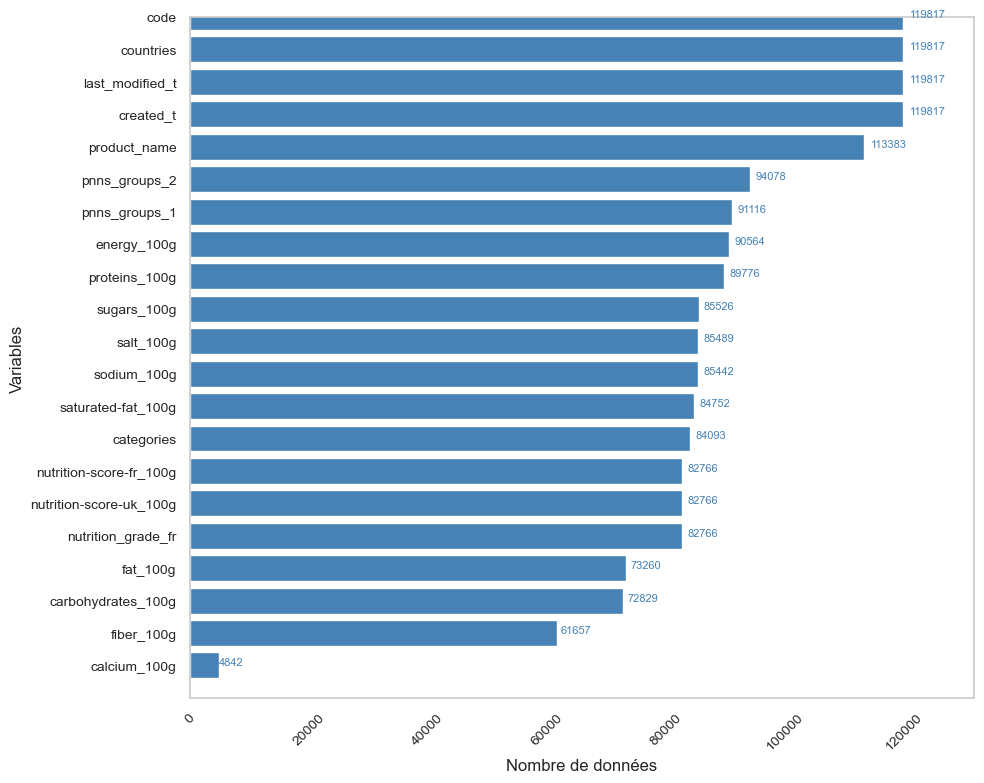

In [780]:
#Visualisation de la complétude des données

fig, ax = plt.subplots(figsize=(10, 8)) 

# Graphique ligne 1, colonne 1 -------------------
# Répartition des valeurs renseignées par variables
valeur = data.count()
valeur.sort_values(inplace=True)
ax.barh(y=valeur.index, width=valeur.values, color='SteelBlue')
ax.set_xlabel('Nombre de données', fontsize=12)
ax.set_ylabel('Variables', fontsize=12)
ax.tick_params(labelsize=10)
ax.set_xlim([0, valeur.max() + valeur.max() * 0.1])
ax.set_ylim([-1, len(valeur) - 1]) 
ax.grid(False)

# Pour les étiquettes de données sur les barres
for index, value in enumerate(valeur):
    ax.text(value + value * 0.01, index, str(value), color='SteelBlue', fontsize=8)

# Ajuste les étiquettes de l'axe des x pour qu'elles ne se chevauchent pas
plt.xticks(rotation=45)

fig.tight_layout() 
plt.show()

- **Le graphique à barres horizontales représente la répartition du nombre de données renseignées pour chaque variable du DataFrame.**

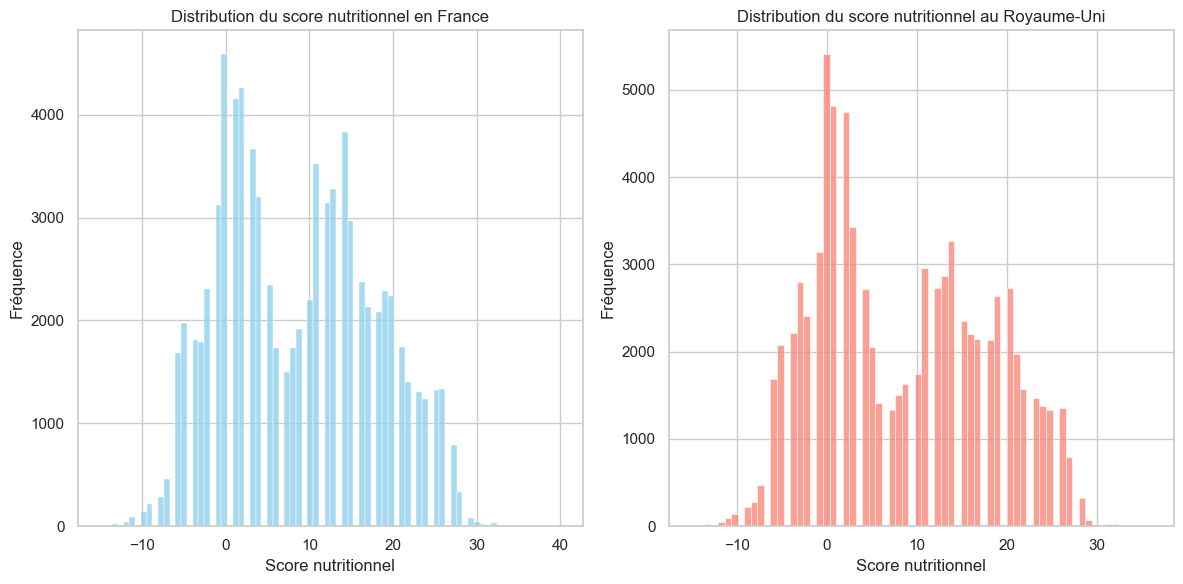

In [781]:
# Création d'une figure avec deux sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogrammes des deux variables
sns.histplot(data=data, x='nutrition-score-fr_100g', color='skyblue', ax=axes[0])
axes[0].set_title('Distribution du score nutritionnel en France')

sns.histplot(data=data, x='nutrition-score-uk_100g', color='salmon', ax=axes[1])
axes[1].set_title('Distribution du score nutritionnel au Royaume-Uni')

# Réglages des étiquettes
for ax in axes:
    ax.set_xlabel('Score nutritionnel')
    ax.set_ylabel('Fréquence')

# Ajustement de l'espacement entre les graphiques
plt.tight_layout()

# Affichage des graphiques
plt.show()


- **Les deux histogrammes nous montrent la distribution du score nutritionnel pour des produits en France et au Royaume-Uni.**
- Chaque barre représente le nombre de produits qui ont un certain score nutritionnel.
- Un score plus bas (négatif) indique une meilleure qualité nutritionnelle(cela signifie que le produit a plus de qualités nutritionnelles positives par rapport aux éléments négatifs),tandis qu'un score plus élevé (positif) indique une qualité nutritionnelle inférieure.
- **Ces distributions peuvent fournir des indications sur la qualité nutritionnelle générale des aliments disponibles dans les bases de données de chaque pays et peuvent être utilisées pour informer les politiques de santé publique ou pour orienter les consommateurs vers des choix plus sains.**

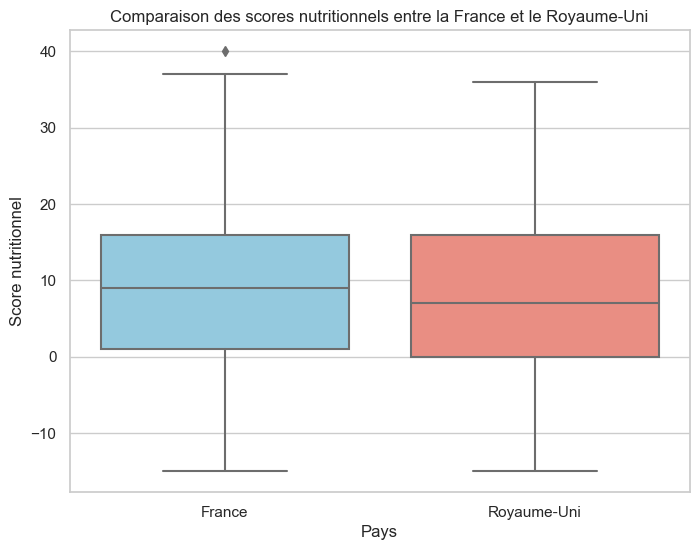

In [782]:
# Création d'un boxplot pour comparer les deux distributions
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['nutrition-score-fr_100g', 'nutrition-score-uk_100g']], palette=['skyblue', 'salmon'])
plt.title('Comparaison des scores nutritionnels entre la France et le Royaume-Uni')
plt.xlabel('Pays')
plt.ylabel('Score nutritionnel')
plt.xticks([0, 1], ['France', 'Royaume-Uni'])
plt.show()


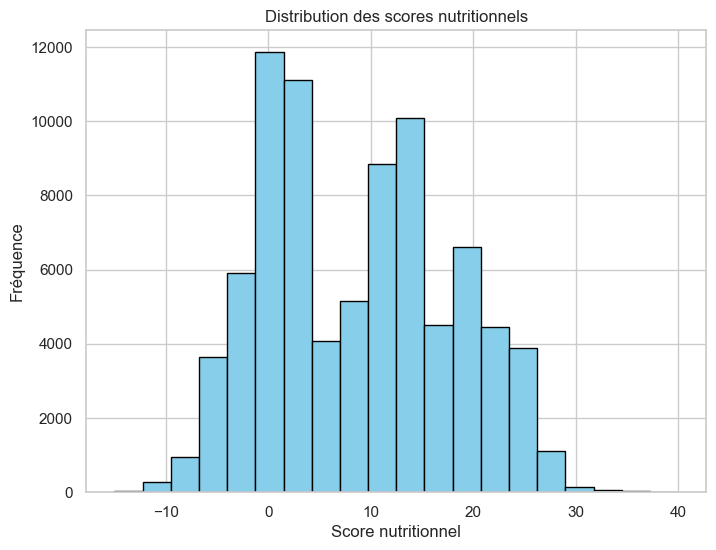

In [783]:
import matplotlib.pyplot as plt

# Créer un histogramme pour la distribution des scores nutritionnels
plt.figure(figsize=(8, 6))
plt.hist(data['nutrition-score-fr_100g'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution des scores nutritionnels')
plt.xlabel('Score nutritionnel')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()


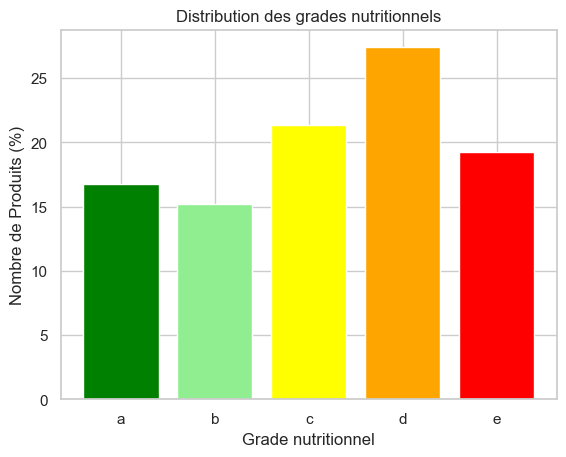

In [784]:
# Compter le nombre de chaque valeur dans la colonne 'nutrition_grade_fr'
distribution_grade_nutrition_fr = data['nutrition_grade_fr'].value_counts(normalize=True) * 100
distribution_grade_nutrition_fr = distribution_grade_nutrition_fr.reindex(['a', 'b', 'c', 'd', 'e'])
# Créer un graphique en barres pour afficher la distribution des grades nutritionnels
plt.bar(distribution_grade_nutrition_fr.index, distribution_grade_nutrition_fr.values, color=['green', 'lightgreen', 'yellow', 'orange', 'red'])

# Ajouter des titres et des étiquettes aux axes
plt.title('Distribution des grades nutritionnels')
plt.xlabel('Grade nutritionnel')
plt.ylabel('Nombre de Produits (%)')

plt.show()

- **Le graphique fournit un aperçu visuel rapide de la qualité nutritionnelle des produits alimentaires français, permettant de déduire quelles notes Nutri-Score sont les plus courantes parmi ces produits.**

- **Le Nutri-Score est un système qui classe les aliments de A (meilleur pour la santé) à E (moins bon pour la santé) en fonction de leur composition nutritionnelle.**
- **Plus un aliment contient de nutriments favorables à la santé comme les fibres et les protéines, et moins il contient de sucre, de sel, de calories et de graisses saturées, meilleur sera son score.**

- **La colonne "nutrition-score-fr_100g" de notre jeu de données donne un score numérique qui correspond à ce système, aidant à identifier rapidement la qualité nutritionnelle d'un produit.**

 ### <a name="C13"><font color='DodgerBlue'>3. Nettoyage des données par "Produit"(lignes)</a>

### <a name="C14"><font color='Blue'>3.1 Analyse et traitements des données redondantes</a>

- Identifier les doublons,les supprimer ou les fusionner si nécessaire.

In [785]:
# Analyse et traitements des données redondantes
data.duplicated(subset=None, keep='first')

46        False
106       False
136       False
138       False
174       False
          ...  
320762    False
320763    False
320765    False
320766    False
320769    False
Length: 119817, dtype: bool

In [786]:
data.duplicated(subset=None, keep='first').value_counts()

False    119817
Name: count, dtype: int64

In [787]:
# Suppression des doublons complets
data = data.drop_duplicates(keep='first')

# Suppression des doublons en excluant certaines colonnes (code, created_t, last_modified_t)
cols_a_exclure = ['code', 'created_t', 'last_modified_t']
cols_check = data.columns.difference(cols_a_exclure)
data = data.drop_duplicates(subset=cols_check, keep='first')

# Suppression des doublons basés sur le nom du produit et des valeurs nutritionnelles spécifiques
nutrition_cols = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 
                  'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 
                  'salt_100g', 'sodium_100g','calcium_100g','nutrition-score-fr_100g','nutrition-score-uk_100g','nutrition_grade_fr']
cols_check_final = ['product_name'] + nutrition_cols
data = data.drop_duplicates(subset=cols_check_final, keep='first')
data

code               product_name  \
46      0000000024600              Filet de bœuf   
106     0000000036252             Lion Peanut x2   
136     0000000039259                    Twix x2   
138     0000000039529             Pack de 2 Twix   
174     0000000290616               Salade Cesar   
...               ...                        ...   
320761  9906410000009  Roussette du Bugey (2011)   
320762  9908278636246   Szprot w oleju roslinnym   
320763       99111250         Thé vert Earl grey   
320765  9935010000003             Rillette d'oie   
320769  9970229501521                    乐吧泡菜味薯片   

                                               categories   countries  \
46                                          Filet de bœuf      France   
106                                                   NaN  France, US   
136                                                   NaN      France   
138                                                   NaN  France, US   
174                                      Légumes-feuilles      Canada   
...                                                   ...         ...   
320761  Boissons,Boissons alcoolisées,Vins,Vins blancs...      France   
320762                                          pl:Szprot      Poland   
320763                                         thés verts      France   
320765  Viandes,Produits à tartiner,Charcuteries,Produ...      France   
320769                                       Potato chips       China   

        energy_100g  proteins_100g  fat_100g  saturated-fat_100g  \
46              NaN            NaN       NaN                 NaN   
106          1883.0           2.50     20.00                12.5   
136             NaN            NaN       NaN                 NaN   
138          1481.0           6.25      4.17                 NaN   
174          1210.0          22.00     12.00                 7.0   
...             ...            ...       ...                 ...   
320761          NaN            NaN       NaN                 NaN   
320762          NaN            NaN       NaN                 NaN   
320763         21.0           0.50      0.20                 0.2   
320765          NaN            NaN       NaN                 NaN   
320769          NaN            NaN       NaN                 NaN   

        carbohydrates_100g  sugars_100g  ...  salt_100g  sodium_100g  \
46                     NaN          NaN  ...        NaN          NaN   
106                  70.00         57.5  ...    0.09652        0.038   
136                    NaN          NaN  ...        NaN          NaN   
138                  77.08          NaN  ...        NaN          NaN   
174                  23.00          0.0  ...    2.16000        0.850   
...                    ...          ...  ...        ...          ...   
320761                 NaN          NaN  ...        NaN          NaN   
320762                 NaN          NaN  ...        NaN          NaN   
320763                0.50          0.5  ...    0.02540        0.010   
320765                 NaN          NaN  ...        NaN          NaN   
320769                 NaN          NaN  ...        NaN          NaN   

        calcium_100g  nutrition-score-fr_100g  nutrition-score-uk_100g  \
46               NaN                      NaN                      NaN   
106              0.1                     22.0                     22.0   
136              NaN                      NaN                      NaN   
138              NaN                      NaN                      NaN   
174              0.0                      6.0                      6.0   
...              ...                      ...                      ...   
320761           NaN                      NaN                      NaN   
320762           NaN                      NaN                      NaN   
320763           NaN                      2.0                      0.0   
320765           NaN                      NaN                      NaN   
320769           Na

In [788]:
# Compter le nombre de lignes en doublon
nombre_doublons = data.duplicated().sum()

# Afficher le nombre de lignes en doublon
print("Il y a {} lignes en doublon dans le DataFrame 'data'.".format(nombre_doublons))

Il y a 0 lignes en doublon dans le DataFrame 'data'.


### <a name="C15"><font color='Blue'>3.2 Suppression des colonnes  peu renseignés</a>

- Identifier les produits avec un nombre trop faible de valeurs renseignées.

In [789]:
# Longueur du DF 'data' avant traitement
print(f"Longueur du DF 'data' avant traitement : {len(data)}")

# Sélection des colonnes de valeurs nutritionnelles, à l'exception de 'nutrition-score-fr_100g'
listCols100g = data.filter(like='_100g', axis=1).columns.drop('nutrition-score-fr_100g')

# Suppression des lignes sans valeurs nutritionnelles renseignées
data.dropna(subset=listCols100g, how='all', inplace=True)

# Suppression des lignes sans nom de produit renseigné
data = data[data['product_name'].notnull()]

# Longueur du DF 'data' après traitement
print(f"Longueur du DF 'data' après traitement : {len(data)}")

Longueur du DF 'data' avant traitement : 112073
Longueur du DF 'data' après traitement : 87130


In [790]:
# Supprimer les lignes où n'importe quelle valeur est égale à zéro
data = data.loc[~(data == 0).any(axis=1)]
data

code                         product_name  \
106     0000000036252                       Lion Peanut x2   
138     0000000039529                       Pack de 2 Twix   
175     0000000394710       Danoises à la cannelle roulées   
180     0000001938067         Chaussons tressés aux pommes   
181     0000004302544                  Pain Burger Artisan   
...               ...                                  ...   
320698       96103890           Eat Natural Protein Packed   
320702       96118580       Fisherman's Friend Miel-Citron   
320717  9688014090357      100 г очищенных жареных семечек   
320734  9778564312457  Nature cheddar and red onion crisps   
320751  9847548283004  Tartines craquantes bio au sarrasin   

                                               categories   countries  \
106                                                   NaN  France, US   
138                                                   NaN  France, US   
175         Snacks sucrés,Biscuits et gâteaux,Pâtisseries      Canada   
180         Snacks sucrés,Biscuits et gâteaux,Pâtisseries      Canada   
181                                              Boulange      Canada   
...                                                   ...         ...   
320698                                                NaN      France   
320702                                  Bonbons,Pastilles      France   
320717  Plant-based foods and beverages,Plant-based fo...      Россия   
320734                                             Crisps   France,UK   
320751                    Biscottes au sarrasin,Biscottes      France   

        energy_100g  proteins_100g  fat_100g  saturated-fat_100g  \
106          1883.0          2.500     20.00              12.500   
138          1481.0          6.250      4.17                 NaN   
175          1520.0          4.790     14.40                 NaN   
180          1090.0          3.330     10.70               2.000   
181          1160.0         10.000      1.11               0.333   
...             ...            ...       ...                 ...   
320698       1996.0         22.000       NaN              10.000   
320702       1031.0          0.004      1.30               1.280   
320717       2970.0         26.000     65.00                 NaN   
320734       2155.0          7.800       NaN               3.400   
320751       1643.0         13.000      2.80               0.600   

        carbohydrates_100g  sugars_100g  ...  salt_100g  sodium_100g  \
106                  70.00        57.50  ...    0.09652     0.038000   
138                  77.08          NaN  ...        NaN          NaN   
175                  54.10        28.10  ...    0.92200     0.363000   
180                  38.70        24.70  ...    0.64700     0.255000   
181                  53.30         1.11  ...    1.52000     0.600000   
...                    ...          ...  ...        ...          ...   
320698                 NaN        22.00  ...    1.00000     0.393701   
320702               95.31         0.10  ...    0.00100     0.000394   
320717                6.00          NaN  ...        NaN          NaN   
320734                 NaN         1.80  ...    1.35000     0.531496   
320751               74.80         2.60  ...    0.68000     0.267717   

        calcium_100g  nutrition-score-fr_100g  nutrition-score-uk_100g  \
106           0.1000                     22.0                     22.0   
138              NaN                      NaN                      NaN   
175           0.0548                      NaN                      NaN   
180           0.0133                      9.0                      9.0   
181           0.0222                      1.0                      1.0   
...              ...                      ...                      ...   
320698           NaN                     17.0                     17.0   
320702           NaN                      2.0                      2.0   
320717           NaN                      NaN  

### <a name="C16"><font color='Blue'>3.3 Analyse et traitements des données aberrantes</a>

In [791]:
#Traitons les valeurs aberrantes
data.describe()

energy_100g  proteins_100g      fat_100g  saturated-fat_100g  \
count   55000.000000   54351.000000  48227.000000        50826.000000   
mean     1217.990568       8.085526     14.598066            5.863327   
std      1076.150754       7.144613     15.219376            7.719725   
min         0.420000       0.000100      0.001000            0.000100   
25%       531.000000       3.300000      2.670000            0.700000   
50%      1180.000000       6.500000      9.300000            2.620000   
75%      1802.000000      10.600000     23.000000            8.600000   
max    182764.000000     100.000000    105.000000          100.000000   

       carbohydrates_100g   sugars_100g    fiber_100g     salt_100g  \
count        47889.000000  51081.000000  33986.000000  5.110900e+04   
mean            30.870327     14.221196      3.694143  1.225597e+00   
std             26.524966     18.070406      4.810420  5.937964e+00   
min              0.001000     -0.100000      0.000100  5.000000e-08   
25%              5.800000      1.500000      1.200000  1.300000e-01   
50%             22.000000      4.600000      2.500000  6.800000e-01   
75%             56.000000     23.200000      4.500000  1.300000e+00   
max            105.000000    105.000000    178.000000  9.300000e+02   

        sodium_100g  calcium_100g  nutrition-score-fr_100g  \
count  5.110500e+04   2396.000000             49508.000000   
mean   4.825532e-01      0.283051                 9.270865   
std    2.337849e+00      1.685410                 9.281132   
min    1.968504e-08      0.000002               -15.000000   
25%    5.118110e-02      0.109000                 2.000000   
50%    2.677165e-01      0.124000                10.000000   
75%    5.118110e-01      0.264000                16.000000   
max    3.661417e+02     69.500000                40.000000   

       nutrition-score-uk_100g  
count             49508.000000  
mean                  9.243476  
std                   9.442138  
min                 -15.000000  
25%                   1.000000  
50%                   9.000000  
75%                  17.000000  
max                  36.000000

- Daprès le decriptif statistique ,on remarque que:

- **energy_100g :** La valeur maximale est extrêmement élevée , ce qui est inhabituel pour une mesure énergétique par 100 grammes et suggère probablement une erreur de saisie.
- **fat_100g, saturated-fat_100g, carbohydrates_100g, sugars_100g, fiber_100g, proteins_100g :** Les valeurs maximales semblent être dans des plages possibles sauf si ces valeurs ne peuvent pas dépasser 100 (ce qui est le cas pour des pourcentages de 100g). Par exemple, une valeur de 105 pour fat_100g est impossible car cela signifierait que le produit contient plus de matières grasses que le produit lui-même.
- **salt_100g et sodium_100g :** Il semble y avoir une valeur extrêmement élevée dans sodium_100g qui est improbable d'un point de vue nutritionnel et pourrait indiquer une erreur.
- **additives_n :** Le nombre d'additifs varie de 1 à 31, ce qui est plausible, mais cela dépend du type de produits dans l'ensemble de données.
- **vitamin-a_100g, vitamin-c_100g, calcium_100g, iron_100g :** Ces valeurs semblent contenir des erreurs de saisie, comme en témoignent les valeurs maximales extrêmement élevées.
- **nutrition-score-fr_100g, nutrition-score-uk_100g :** Ces scores devraient théoriquement être dans une plage similaire, mais il y a une valeur négative qui pourrait représenter une anomalie ou une caractéristique spécifique de l'algorithme de notation.

- Avant d'analyser les valeurs aberrantes, il faut comprendre ce que chaque colonne représente et quelles sont les plages de valeurs attendues pour une mesure nutritionnelle par 100g de produit. **Par exemple, pour energy_100g, une valeur raisonnable serait généralement inférieure à 900 kcal (puisque c'est l'énergie fournie par 100g de graisse, qui est l'aliment le plus énergétique), ce qui correspond à environ 3766 kJ. Tout ce qui dépasse ces valeurs peut être considéré comme une erreur.**

In [792]:
#Re-calcul du taux de remplissage
data_cols = (data.notnull().sum()/len(data)).sort_values(ascending=False)
data_cols

code                       1.000000
last_modified_t            1.000000
countries                  1.000000
product_name               1.000000
created_t                  1.000000
energy_100g                0.985575
proteins_100g              0.973945
salt_100g                  0.915850
sodium_100g                0.915778
sugars_100g                0.915348
saturated-fat_100g         0.910779
nutrition_grade_fr         0.887161
nutrition-score-fr_100g    0.887161
nutrition-score-uk_100g    0.887161
fat_100g                   0.864206
carbohydrates_100g         0.858149
pnns_groups_2              0.823277
pnns_groups_1              0.821593
categories                 0.774644
fiber_100g                 0.609014
calcium_100g               0.042935
dtype: float64

In [793]:
# Identifier les valeurs aberrantes pour 'energy_100g'
# On suppose que la valeur énergétique maximale plausible par 100g est de 3766 kJ (environ 900 kcal)
energy_kj_max = 3766 
data = data[(data['energy_100g'] <= energy_kj_max) | data['energy_100g'].isnull()]

# Pour les autres nutriments, supposer qu'une valeur ne peut pas dépasser 100g par 100g de produit
nutrients = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g','salt_100g','sodium_100g','calcium_100g']
for nutrient in nutrients:
    data = data[(data[nutrient] <= 100) | data[nutrient].isnull()]

# Comparaison spécifique : carbohydrates_100g >= sugars_100g
data = data[(data['carbohydrates_100g'] >= data['sugars_100g']) | data['carbohydrates_100g'].isnull() | data['sugars_100g'].isnull()]

# Comparaison spécifique : saturated-fat_100g <= fat_100g
data = data[(data['saturated-fat_100g'] <= data['fat_100g']) | data['saturated-fat_100g'].isnull() | data['fat_100g'].isnull()]

# Traitement pour 'sodium_100g' en supposant que la valeur ne doit pas dépasser la quantité de 'salt_100g'
data = data[(data['sodium_100g'] <= data['salt_100g'] * 0.4) | data['sodium_100g'].isnull()]


# Pour 'nutrition-score-fr_100g' et 'nutrition-score-uk_100g', on va supprimer les valeurs négatives
scores = ['nutrition-score-fr_100g', 'nutrition-score-uk_100g']
for score in scores:
    data = data[(data[score] >= 0) | data[score].isnull()]

# Affichage du nombre de lignes et de colonnes après le traitement des valeurs aberrantes
print(f"Le DataFrame contient maintenant {data.shape[0]} lignes et {data.shape[1]} colonnes après le traitement des valeurs aberrantes.")

Le DataFrame contient maintenant 45905 lignes et 21 colonnes après le traitement des valeurs aberrantes.


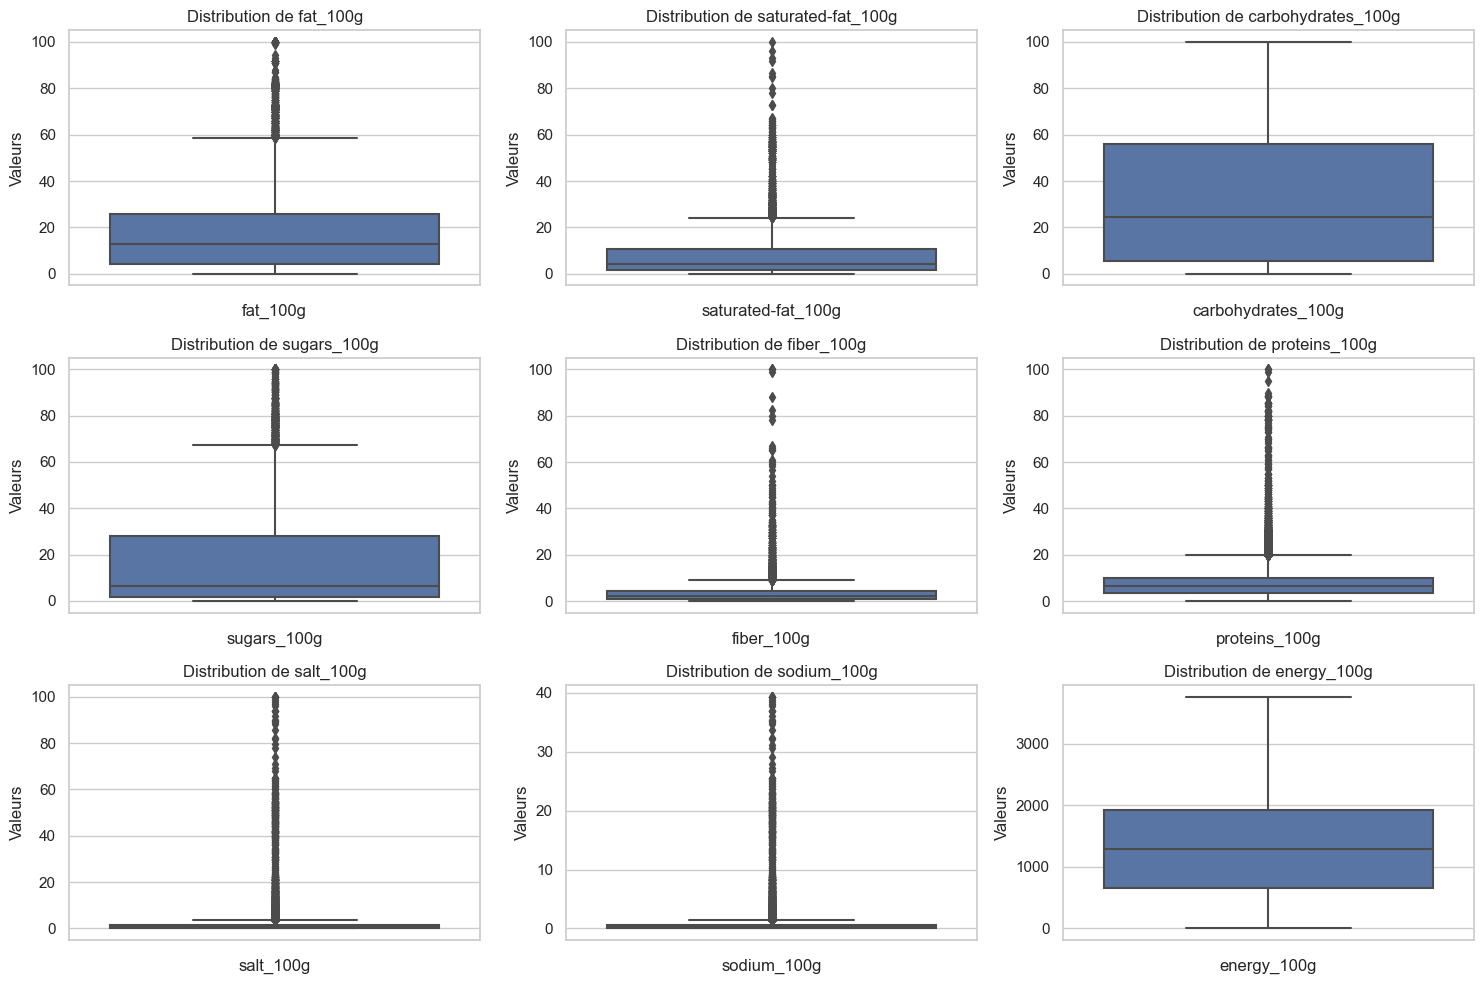

In [794]:
# boxplots des variables nutritionnelles  
nutrients = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'energy_100g']

# Création des boxplots
plt.figure(figsize=(15, 10))
for i, nutrient in enumerate(nutrients, 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(y=data[nutrient])
    plt.title(f'Distribution de {nutrient}')
    plt.xlabel(nutrient)
    plt.ylabel('Valeurs')

plt.tight_layout()
plt.show()

- **Boxplots : Pour presque toutes les variables, il y a des valeurs extrêmes qui sont nettement différentes de la majorité des observations. Ces valeurs pourraient être des erreurs de saisie, des produits très atypiques, ou simplement des produits avec des teneurs nutritionnelles extrêmes.**

- **Distribution asymétrique: La plupart des variables semblent avoir une distribution asymétrique avec une concentration de données dans les gammes inférieures et des valeurs extrêmes s'étendant vers le haut.**

- **Considérations pour la modélisation: La présence de valeurs extrêmes peut affecter les performances des modèles de Machine Learning. Il pourrait être nécessaire de transformer ces variables, par exemple en appliquant une transformation logarithmique, ou d'utiliser des modèles robustes aux valeurs extrêmes.**

### <a name="C17"><font color='Blue'>3.4 Analyse et traitements des données manquantes (hors "nutriscore_score" et "nutriscore_grade")</a>

- La complétion des colonnes 'nutriscore_score' et 'nutriscore_grade' sera abordée dans une section spécifique, où je mettrai en œuvre des techniques de Machine Learning.
- Pour compléter les données manquantes des autres colonnes, j'ai décidé d'employer la moyenne ou la médiane des valeurs existantes en tant que valeurs de remplacement.

In [795]:
# Calculer le pourcentage de valeurs manquantes pour chaque colonne
pourcentage_nan = data.isna().mean() * 100

# Créer des plages de pourcentage de valeurs manquantes
bins = [-1, 0, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ["0%", "0-1%", "1-5%", "5-10%", "10-20%", "20-30%", "30-40%", "40-50%", "50-60%", "60-70%", "70-80%", "80-90%", "90-100%"]

# Catégoriser chaque colonne dans les plages de pourcentage de valeurs manquantes
plages_pourcentage = pd.cut(pourcentage_nan, bins, labels=labels)

# Calculer le nombre de variables dans chaque plage
nombre_variables_par_plage = plages_pourcentage.value_counts().sort_index()
resultat_tableau = nombre_variables_par_plage.to_frame(name='Nombre de Colonnes').reset_index()
resultat_tableau.columns = ['Plage de %', 'Nb_variables']
print(resultat_tableau)

   Plage de %  Nb_variables
0          0%             5
1        0-1%             0
2        1-5%             2
3       5-10%             0
4      10-20%            11
5      20-30%             1
6      30-40%             0
7      40-50%             1
8      50-60%             0
9      60-70%             0
10     70-80%             0
11     80-90%             0
12    90-100%             1


- **2 variables avec plus de 50% de valeurs manquantes.**

- Le traitement des valeurs manquantes en analyse de données peut se faire par **"suppression"** ou **"imputation"**.
- **La suppression élimine les données manquantes mais risque de perdre des informations importantes.**

- **L'imputation remplace les valeurs manquantes par des estimations, en utilisant des méthodes telles que :**
- **le remplacement par zéro**: simple mais peut ne pas être idéal pour toutes les analyses
- **Remplacement par la moyenne ou la médiane** : utile pour conserver la distribution générale des données.
- **l'algorithme KNN** : estime les valeurs manquantes en se basant sur les voisins les plus proches, utile pour les données avec des relations complexes.
- **IterativeImputer** : applique une approche itérative pour estimer les valeurs manquantes, en tenant compte des relations entre variables.

- **Ces méthodes permettant de préserver les données mais pouvant introduire des biais.**
- **Le choix de méthode dépend du contexte des données.**

In [796]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 45905 entries, 106 to 320734
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     45905 non-null  object 
 1   product_name             45905 non-null  object 
 2   categories               35589 non-null  object 
 3   countries                45905 non-null  object 
 4   energy_100g              45109 non-null  float64
 5   proteins_100g            44463 non-null  float64
 6   fat_100g                 40007 non-null  float64
 7   saturated-fat_100g       40938 non-null  float64
 8   carbohydrates_100g       39667 non-null  float64
 9   sugars_100g              41199 non-null  float64
 10  fiber_100g               25309 non-null  float64
 11  salt_100g                41225 non-null  float64
 12  sodium_100g              41221 non-null  float64
 13  calcium_100g             1993 non-null   float64
 14  nutrition-score-fr_100g 

energy_100g  proteins_100g      fat_100g  saturated-fat_100g  \
count  45109.000000   44463.000000  40007.000000        40938.000000   
mean    1307.251750       8.121284     16.924934            7.083739   
std      729.331875       7.221293     15.567111            8.056333   
min        0.420000       0.000100      0.001000            0.000100   
25%      657.000000       3.500000      4.000000            1.500000   
50%     1293.000000       6.400000     13.000000            4.000000   
75%     1918.000000      10.000000     25.800000           10.600000   
max     3766.000000     100.000000    100.000000          100.000000   

       carbohydrates_100g   sugars_100g    fiber_100g     salt_100g  \
count        39667.000000  41199.000000  25309.000000  4.122500e+04   
mean            31.454675     16.647400      3.343710  1.378835e+00   
std             26.375039     19.155533      4.182168  4.067979e+00   
min              0.001000     -0.100000      0.000100  5.000000e-08   
25%              5.700000      1.800000      1.000000  1.900000e-01   
50%             24.500000      6.500000      2.200000  8.000000e-01   
75%             56.000000     28.000000      4.200000  1.500000e+00   
max            100.000000    100.000000    100.000000  1.000000e+02   

        sodium_100g  calcium_100g  nutrition-score-fr_100g  \
count  4.122100e+04   1993.000000             39625.000000   
mean   5.428975e-01      0.310621                12.326864   
std    1.601631e+00      1.846003                 7.584214   
min    1.968504e-08      0.000002                 1.000000   
25%    7.480315e-02      0.100000                 5.000000   
50%    3.149606e-01      0.133000                12.000000   
75%    5.905512e-01      0.300000                18.000000   
max    3.937008e+01     69.500000                40.000000   

       nutrition-score-uk_100g  
count             39625.000000  
mean                 12.381249  
std                   7.718654  
min                   1.000000  
25%                   5.000000  
50%                  12.000000  
75%                  19.000000  
max                  36.000000

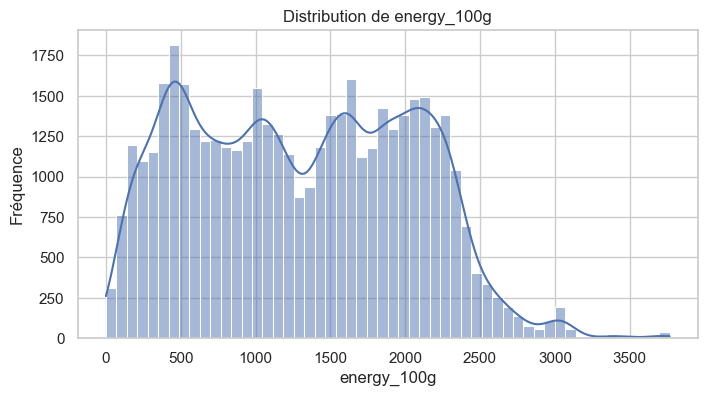

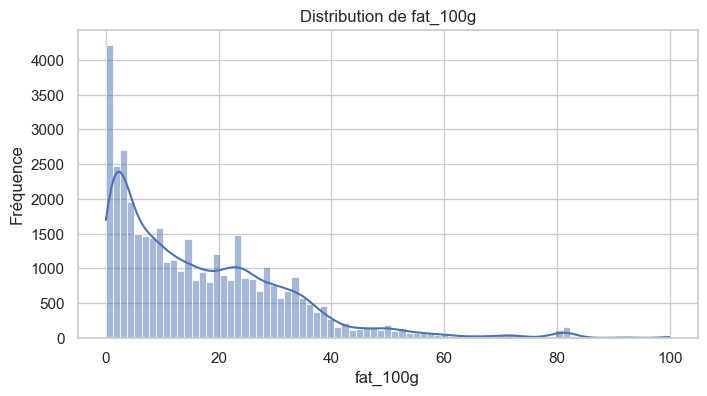

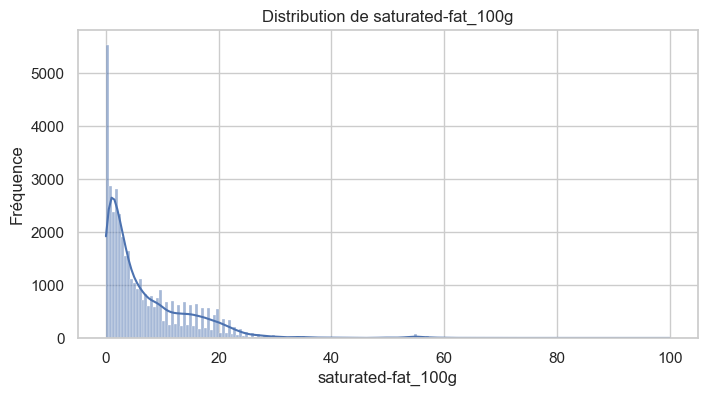

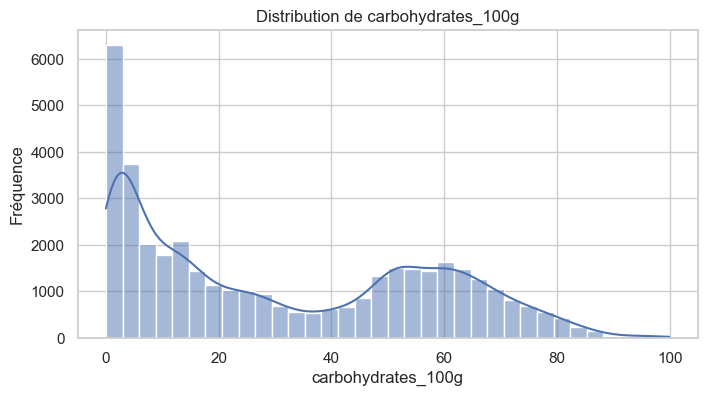

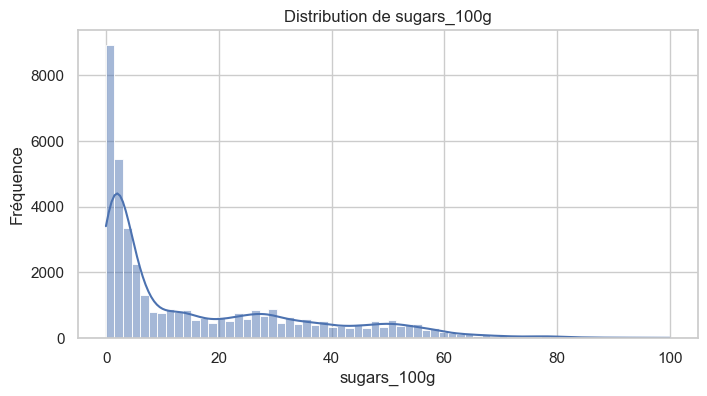

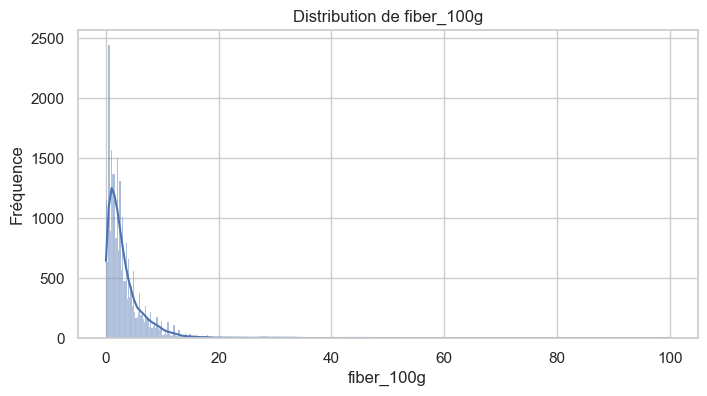

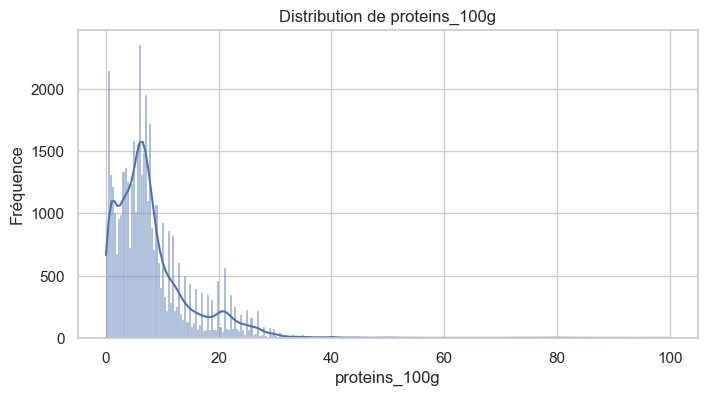

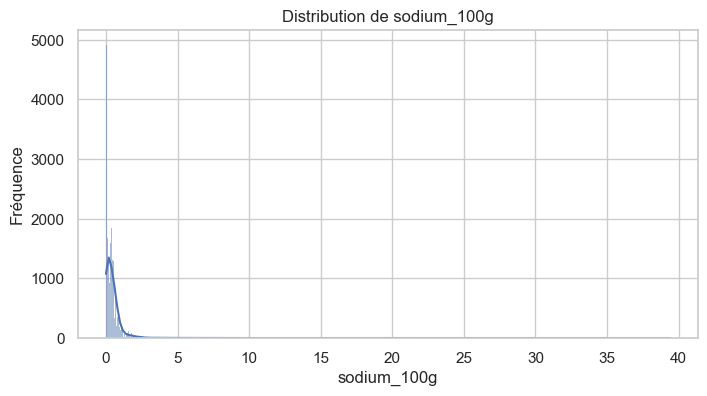

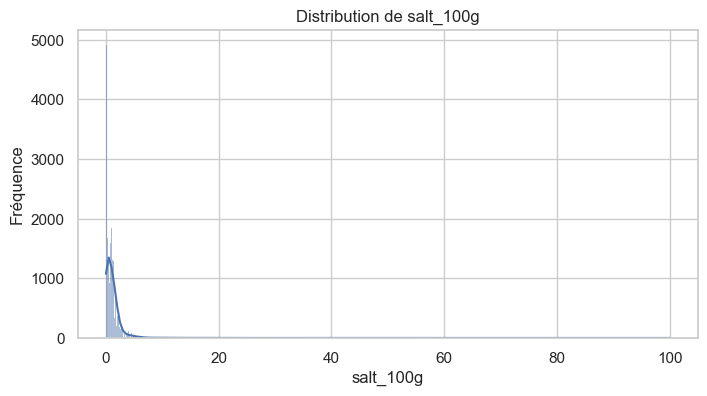

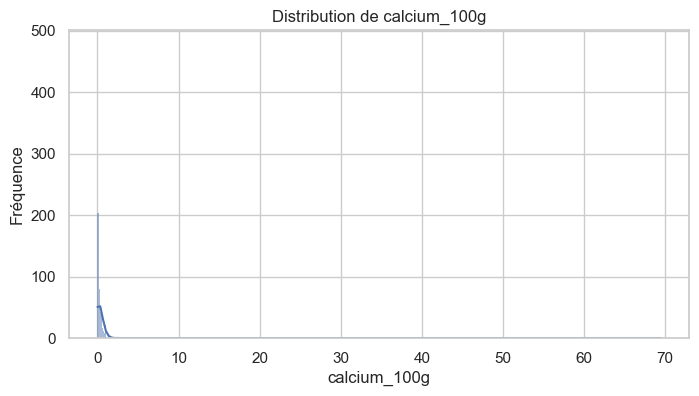

In [797]:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

# Liste des variables numériques pour lesquelles vérifier la distribution
variables = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g','sodium_100g','salt_100g','calcium_100g']

# Générer un histogramme pour chaque variable
for variable in variables:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[variable].dropna(), kde=True)  # KDE pour la densité
    plt.title(f'Distribution de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Fréquence')
    plt.show()

- **Les histogrammes montrent que la majorité des produits ont des teneurs basses à modérées en nutriments, avec des exceptions notables pour des valeurs élevées (par exemple, des produits très énergétiques ou très sucrés).**
- **Les pics et les longues queues indiquent une variété dans les profils nutritionnels, nécessitant potentiellement des transformations de données pour une analyse plus robuste (par exemple, des produits avec des teneurs élevées en sucre comme les confiseries).**

#### <font color='blue light'>3.4.1 Imputation des valeurs manquantes par la médiane ou la moyenne

In [798]:
# Pour l'imputation par la médiane ou la moyenne selon la distribution observée
for variable in variables:
    if data[variable].skew() > 1 or data[variable].skew() < -1:
        # Si la distribution est fortement asymétrique, utilisez la médiane
        median_value = data[variable].median()
        data[variable] = data[variable].fillna(median_value)
        print(f"{variable} imputée par la médiane.")
    else:
        # Si la distribution est plus symétrique, utilisez la moyenne
        mean_value = data[variable].mean()
        data[variable] = data[variable].fillna(mean_value)  
        print(f"{variable} imputée par la moyenne.")

energy_100g imputée par la moyenne.
fat_100g imputée par la médiane.
saturated-fat_100g imputée par la médiane.
carbohydrates_100g imputée par la moyenne.
sugars_100g imputée par la médiane.
fiber_100g imputée par la médiane.
proteins_100g imputée par la médiane.
sodium_100g imputée par la médiane.
salt_100g imputée par la médiane.
calcium_100g imputée par la médiane.


In [799]:
# Imputation par la moyenne pour 'energy_100g' et 'carbohydrates_100g'
data['energy_100g'] = data['energy_100g'].fillna(data['energy_100g'].mean())
data['carbohydrates_100g'] = data['carbohydrates_100g'].fillna(data['carbohydrates_100g'].mean())

# Imputation par la médiane pour 'fat_100g', 'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g', 'salt_100g' et 'calcium_100g'
data['fat_100g'] = data['fat_100g'].fillna(data['fat_100g'].median())
data['saturated-fat_100g'] = data['saturated-fat_100g'].fillna(data['saturated-fat_100g'].median())
data['sugars_100g'] = data['sugars_100g'].fillna(data['sugars_100g'].median())
data['fiber_100g'] = data['fiber_100g'].fillna(data['fiber_100g'].median())
data['proteins_100g'] = data['proteins_100g'].fillna(data['proteins_100g'].median())
data['sodium_100g'] = data['sodium_100g'].fillna(data['sodium_100g'].median())
data['salt_100g'] = data['salt_100g'].fillna(data['salt_100g'].median())
data['calcium_100g'] = data['calcium_100g'].fillna(data['calcium_100g'].median())

print("Imputation effectuée avec succès.")

Imputation effectuée avec succès.


In [800]:
# Compter le nombre de valeurs nulles dans chaque colonne
missing_values = data.isnull().sum()

# Afficher les colonnes avec des valeurs manquantes
print("Colonnes avec des valeurs manquantes :")
print(missing_values[missing_values > 0])

# Vérifier si toutes les colonnes sont remplies
if missing_values.sum() == 0:
    print("Toutes les colonnes sont remplies après les imputations.")
else:
    print("Il reste des colonnes avec des valeurs manquantes après les imputations.")

Colonnes avec des valeurs manquantes :
categories                 10316
nutrition-score-fr_100g     6280
nutrition-score-uk_100g     6280
nutrition_grade_fr          6280
pnns_groups_1               8127
pnns_groups_2               8035
dtype: int64
Il reste des colonnes avec des valeurs manquantes après les imputations.


#### <font color='blue light'>3.4.2 Imputation des valeurs manquantes des variables catégorielles avec la valeur la plus fréquente(mode)

In [801]:
from sklearn.impute import SimpleImputer

# Création d'un imputeur qui remplace les valeurs manquantes par la valeur la plus fréquente(mode) pour les colonnes catégorielles
imputer = SimpleImputer(strategy='most_frequent')

# Application de l'imputeur à chaque colonne catégorielle
data['categories'] = imputer.fit_transform(data[['categories']]).ravel()
data['pnns_groups_1'] = imputer.fit_transform(data[['pnns_groups_1']]).ravel()
data['pnns_groups_2'] = imputer.fit_transform(data[['pnns_groups_2']]).ravel()

#### <font color='blue light'>3.4.3 Imputation des valeurs manquantes de 'nutri_score' et 'nutri_grade' par la Machine learning

- **Dans cette partie, j'utilise le Machine Learning pour m'aider à compléter intelligemment les features 'nutrition-score-fr_100g', 'nutrition_grade_fr' et 'nutrition-score-uk_100g'.**

### <a name="C18"><font color='blue '>A. Régression linéaire</a>

- **La régression linéaire est une méthode statistique qui permet de modéliser la relation entre une variable dépendante (celle qu'on cherche à prédire) et une ou plusieurs variables indépendantes (les facteurs qui influencent la prédiction) en ajustant une ligne droite (modèle linéaire) à travers les données.**

In [802]:
data.head(2)

code    product_name  \
106  0000000036252  Lion Peanut x2   
138  0000000039529  Pack de 2 Twix   

                                     categories   countries  energy_100g  \
106  Snacks sucrés,Biscuits et gâteaux,Biscuits  France, US       1883.0   
138  Snacks sucrés,Biscuits et gâteaux,Biscuits  France, US       1481.0   

     proteins_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
106           2.50     20.00                12.5               70.00   
138           6.25      4.17                 4.0               77.08   

     sugars_100g  ...  salt_100g  sodium_100g  calcium_100g  \
106         57.5  ...    0.09652     0.038000         0.100   
138          6.5  ...    0.80000     0.314961         0.133   

     nutrition-score-fr_100g  nutrition-score-uk_100g  nutrition_grade_fr  \
106                     22.0                     22.0                   e   
138                      NaN                      NaN                 NaN   

    created_t last_modified_t pnns_groups_1 pnns_groups_2  
106  20150125        20170309       unknown       unknown  
138  20150101        20170309       unknown       unknown  

[2 rows x 21 columns]

In [803]:
# Affiche la proportion de valeurs non manquantes
data_cols2= (data.notnull().sum()/len(data)).sort_values(ascending=False)
data_cols2

code                       1.000000
sugars_100g                1.000000
pnns_groups_1              1.000000
last_modified_t            1.000000
created_t                  1.000000
calcium_100g               1.000000
sodium_100g                1.000000
salt_100g                  1.000000
product_name               1.000000
fiber_100g                 1.000000
carbohydrates_100g         1.000000
saturated-fat_100g         1.000000
fat_100g                   1.000000
proteins_100g              1.000000
energy_100g                1.000000
countries                  1.000000
categories                 1.000000
pnns_groups_2              1.000000
nutrition-score-fr_100g    0.863196
nutrition-score-uk_100g    0.863196
nutrition_grade_fr         0.863196
dtype: float64

In [804]:
 # Suppression de la colonne 'nutrition-score-uk_100g'
data = data.drop(columns=['nutrition-score-uk_100g'])

In [805]:
#Calcul du Taux de Remplissage Initial et Final pour 'nutrition-score-fr_100g'

# Calcul du taux de remplissage initial de 'nutrition-score-fr_100g' dans 'data'
initial_filling_rate = data['nutrition-score-fr_100g'].notnull().sum() / len(data)
print(f"Taux de remplissage initial de 'nutrition-score-fr_100g' dans 'data': {initial_filling_rate}")

# Création d'un nouveau DataFrame 'data_notnull' en excluant les valeurs nulles de 'nutrition-score-fr_100g'
data_notnull= data[data['nutrition-score-fr_100g'].notnull()]

# Le taux de remplissage de 'data_notnull' pour 'nutrition-score-fr_100g' sera toujours de 1.0 puisque toutes les valeurs nulles ont été exclues
filling_rate_data_notnull = data_notnull['nutrition-score-fr_100g'].notnull().sum() / len(data_notnull)
print(f"Taux de remplissage de 'nutrition-score-fr_100g' après exclusion des nulles dans 'data_notnull': {filling_rate_data_notnull}")


Taux de remplissage initial de 'nutrition-score-fr_100g' dans 'data': 0.8631957303126021
Taux de remplissage de 'nutrition-score-fr_100g' après exclusion des nulles dans 'data_notnull': 1.0


In [806]:
from sklearn.model_selection import train_test_split

# Sélectionner uniquement les colonnes numériques pour X
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('nutrition-score-fr_100g')  # Retirez la colonne cible des features

In [807]:
# Préparer les features (X) et la cible (y)
X = data[numeric_cols]
y = data['nutrition-score-fr_100g']

# Supprimer les lignes où y est NaN
non_nan_indices = y.notna()
X = X[non_nan_indices]
y = y[non_nan_indices]

# Supprimer les lignes où X contient des NaN
X = X.dropna()
y = y.loc[X.index]

In [808]:
# Assurez que X ne contient pas non plus de NaN
X = X.dropna()
# Comme nous avons déjà supprimé les NaN de y, nous pouvons simplement utiliser les indices de X pour y
y = y[X.index]

In [809]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [810]:
from sklearn.linear_model import LinearRegression

# Créer le modèle de régression linéaire
model = LinearRegression()

# Ajuster le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Évaluer le modèle sur l'ensemble de test
score = model.score(X_test, y_test)

# Afficher le score R^2 du modèle
print(f"Le score R^2 du modèle est : {score}")

Le score R^2 du modèle est : 0.7121870141562705


- **L'algorithme présente un taux de 71% sur les données de test**

### <a name="C19"><font color='blue '>B. KNN Regressor</a>

- **Le k-NN est un algorithme qui peut servir autant pour la classification que pour la régression. Il est surnommé « nearest neighbors » (plus proches voisins, en français) car le principe de ce modèle consiste en effet à choisir les k données les plus proches du point étudié afin d’en prédire sa valeur.**

- **Le k-NN est un algorithme qui n’utilise pas de modèle statistique. Il est "non paramétrique" et il se base uniquement sur les données d’entraînement.**

In [811]:
# Création d'un DataFrame sans valeur null pour la colonne 'nutrition-score-fr_100g'

print(data['nutrition-score-fr_100g'].notnull().sum()/len(data))
data.head(2)

0.8631957303126021


code    product_name  \
106  0000000036252  Lion Peanut x2   
138  0000000039529  Pack de 2 Twix   

                                     categories   countries  energy_100g  \
106  Snacks sucrés,Biscuits et gâteaux,Biscuits  France, US       1883.0   
138  Snacks sucrés,Biscuits et gâteaux,Biscuits  France, US       1481.0   

     proteins_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
106           2.50     20.00                12.5               70.00   
138           6.25      4.17                 4.0               77.08   

     sugars_100g  fiber_100g  salt_100g  sodium_100g  calcium_100g  \
106         57.5         2.5    0.09652     0.038000         0.100   
138          6.5         6.2    0.80000     0.314961         0.133   

     nutrition-score-fr_100g nutrition_grade_fr created_t last_modified_t  \
106                     22.0                  e  20150125        20170309   
138                      NaN                NaN  20150101        20170309   

    pnns_groups_1 pnns_groups_2  
106       unknown       unknown  
138       unknown       unknown

In [812]:
# Création des features
X = data[numeric_cols]
# Création des labels
y = data['nutrition-score-fr_100g']

# Supprimer les lignes avec des valeurs manquantes dans 'y'
non_nan_indices = y.notna()
X_clean = X.loc[non_nan_indices]
y_clean = y[non_nan_indices]

In [813]:
from sklearn.model_selection import train_test_split

# Ensuite, diviser les données nettoyées en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Maintenant, créez et entraînez votre modèle KNN sur les données nettoyées
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train, y_train)

# Évaluez le modèle sur l'ensemble de test
score = model.score(X_test, y_test)

print(f"Le score R^2 du modèle est : {score}")

Le score R^2 du modèle est : 0.7973786235470115


#### <font color='blue '>"Évaluation de la Performance du Modèle KNN par la Validation Croisée"

In [814]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

# Créer le modèle KNN
model = KNeighborsRegressor()

# Effectuer la validation croisée
scores = cross_val_score(model, X_clean, y_clean, cv=5)

# Afficher les scores pour chaque pli de la validation croisée
print(f"Scores de validation croisée: {scores}")

# Calculez la moyenne des scores pour avoir une idée de la performance globale
print(f"Moyenne des scores de validation croisée: {scores.mean()}")

Scores de validation croisée: [0.79026627 0.79063967 0.76375865 0.75746676 0.79577011]
Moyenne des scores de validation croisée: 0.7795802925909946


In [815]:
# Entraînement du modèle KNN Regressor
model = KNeighborsRegressor()
model.fit(X_clean, y_clean)

KNeighborsRegressor()

#### <font color='blue '>"Remplissage des Valeurs Manquantes avec KNN Regressor"

In [816]:
# Remplissage des valeurs manquantes calculées grâce au KNN Regressor
data['nutrition-score-fr_100g'] = data.apply(lambda row: 
            model.predict(np.array(row[numeric_cols]).reshape(1,10)) \
            if pd.isnull(row['nutrition-score-fr_100g']) \
            else row['nutrition-score-fr_100g'] ,axis=1)

C:\Users\samir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\samir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\samir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\samir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\samir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\samir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning

In [817]:
#Vérification du taux de remplissage de la colonne 'nutrition-score-fr_100g'

len(data['nutrition-score-fr_100g'])/len(data)

1.0

### <a name="C20"><font color='blue '>C. KNN Classifier</a>

- **J'utilise maintenant l'algorithme KNeighborsClassifier pour compléter la colonne 'nutriscore_grade'.**

In [818]:
# Création d'un DataFrame sans valeur null pour la colonne ''nutriscore_grade'
print(data['nutrition_grade_fr'].notnull().sum()/len(data))
data.head(2)

0.8631957303126021


code    product_name  \
106  0000000036252  Lion Peanut x2   
138  0000000039529  Pack de 2 Twix   

                                     categories   countries  energy_100g  \
106  Snacks sucrés,Biscuits et gâteaux,Biscuits  France, US       1883.0   
138  Snacks sucrés,Biscuits et gâteaux,Biscuits  France, US       1481.0   

     proteins_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
106           2.50     20.00                12.5               70.00   
138           6.25      4.17                 4.0               77.08   

     sugars_100g  fiber_100g  salt_100g  sodium_100g  calcium_100g  \
106         57.5         2.5    0.09652     0.038000         0.100   
138          6.5         6.2    0.80000     0.314961         0.133   

    nutrition-score-fr_100g nutrition_grade_fr created_t last_modified_t  \
106                    22.0                  e  20150125        20170309   
138                   [6.2]                NaN  20150101        20170309   

    pnns_groups_1 pnns_groups_2  
106       unknown       unknown  
138       unknown       unknown

In [819]:
# Création des features
X = data[numeric_cols]
# Création des labels
y = data['nutrition_grade_fr'].replace(['a','b','c','d','e'],[1,2,3,4,5])

# Supprimer les lignes avec des valeurs manquantes dans 'y'
non_nan_indices = y.notna()
X_clean = X.loc[non_nan_indices]
y_clean = y[non_nan_indices]

In [820]:
from sklearn.model_selection import train_test_split

# Ensuite, diviser les données nettoyées en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Maintenant, créez et entraînez votre modèle KNN sur les données nettoyées
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train, y_train)

# Évaluez le modèle sur l'ensemble de test
score = model.score(X_test, y_test)

print(f"Le score R^2 du modèle est : {score}")

Le score R^2 du modèle est : 0.6704629712459065


#### <font color='blue '>"Évaluation de la Performance du Modèle KNN par la Validation Croisée"

In [821]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

# Créer le modèle KNN
model = KNeighborsRegressor()

# Effectuer la validation croisée
scores = cross_val_score(model, X_clean, y_clean, cv=5)

# Afficher les scores pour chaque pli de la validation croisée
print(f"Scores de validation croisée: {scores}")

# Calculez la moyenne des scores pour avoir une idée de la performance globale
print(f"Moyenne des scores de validation croisée: {scores.mean()}")

Scores de validation croisée: [0.66477519 0.66155229 0.65684892 0.61192222 0.68308786]
Moyenne des scores de validation croisée: 0.6556372951874521


#### <font color='blue '>"Remplissage des Valeurs Manquantes avec KNN Regressor"

In [822]:
# Entraînement du modèle KNN Regressor
model = KNeighborsRegressor()
model.fit(X_clean, y_clean)

KNeighborsRegressor()

In [823]:
# Remplissage des valeurs manquantes calculées grâce au KNN Regressor
data['nutrition_grade_fr'] = data.apply(lambda row: 
            model.predict(np.array(row[numeric_cols]).reshape(1,10)) \
            if pd.isnull(row['nutrition_grade_fr']) \
            else row['nutrition_grade_fr'] ,axis=1)

C:\Users\samir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\samir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\samir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\samir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\samir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\samir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning

In [824]:
#Vérification du taux de remplissage de la colonne 'nutrition-score-fr_100g'

len(data['nutrition_grade_fr'])/len(data)

1.0

## <a name="C21"><font color='RoyalBlue'>**Étape 4 : Exploration et Analyse des données**<font></a>

- **Notre analyse exploratoire des données va contenir trois parties :**

- Analyses univariées
- Analyses bivariées
- Analyses multivariées

### <a name="C22"><font color='DodgerBlue'>**A. Analyse univariée**</a> 

#### <font color='blue'>**Analyse univariée des variables catégorielles**<font></a>

In [825]:
variables_qualitatives

code              product_name  \
46      0000000024600             Filet de bœuf   
106     0000000036252            Lion Peanut x2   
136     0000000039259                   Twix x2   
138     0000000039529            Pack de 2 Twix   
174     0000000290616              Salade Cesar   
...               ...                       ...   
320762  9908278636246  Szprot w oleju roslinnym   
320763       99111250        Thé vert Earl grey   
320765  9935010000003            Rillette d'oie   
320766       99410148                       NaN   
320769  9970229501521                   乐吧泡菜味薯片   

                                               categories  \
46                                          Filet de bœuf   
106                                                   NaN   
136                                                   NaN   
138                                                   NaN   
174                                      Légumes-feuilles   
...                                                   ...   
320762                                          pl:Szprot   
320763                                         thés verts   
320765  Viandes,Produits à tartiner,Charcuteries,Produ...   
320766                                            Peanuts   
320769                                       Potato chips   

                pnns_groups_1          pnns_groups_2       countries  \
46                    unknown                unknown          France   
106                   unknown                unknown      France, US   
136                   unknown                unknown          France   
138                   unknown                unknown      France, US   
174     Fruits and vegetables             Vegetables          Canada   
...                       ...                    ...             ...   
320762                unknown                unknown          Poland   
320763              Beverages  Non-sugared beverages          France   
320765         Fish Meat Eggs         Processed meat          France   
320766           Salty snacks                   Nuts  United Kingdom   
320769           Salty snacks             Appetizers           China   

       nutrition_grade_fr created_t last_modified_t  
46                    NaN  20150617        20150617  
106                     e  20150125        20170309  
136                   NaN  20150125        20160910  
138                   NaN  20150101        20170309  
174                     c  20170116        20170116  
...                   ...       ...             ...  
320762                NaN  20130211        20140117  
320763                  c  20130428        20130620  
320765                NaN  20151031        20151101  
320766                NaN  20160522        20170403  
320769                NaN  20150124        20170403  

[119817 rows x 9 columns]

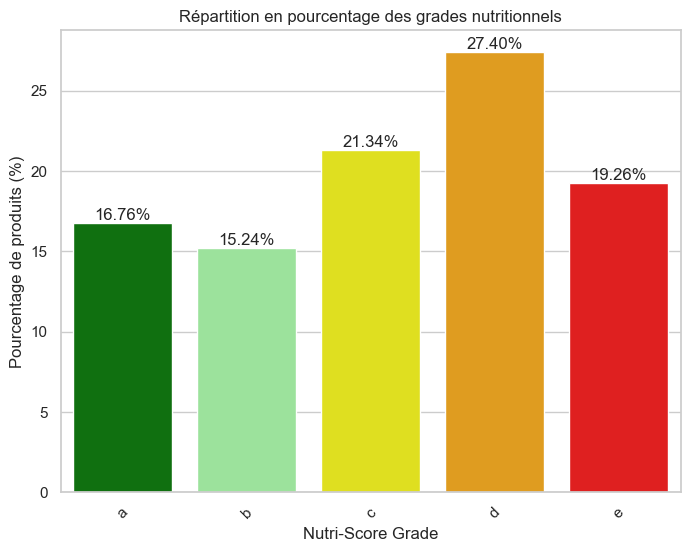

In [826]:
# Comptons le nombre d'occurrences de chaque valeur dans la colonne 'nutrition_grade_fr'
count_by_grade = variables_qualitatives['nutrition_grade_fr'].value_counts(normalize=True).sort_index() * 100

# Définition de la palette de couleurs pour les grades Nutri-Score
nutriscore_colors = ['green', 'lightgreen', 'yellow', 'orange', 'red']

# Créons un graphique à barres avec les pourcentages correspondant aux codes Nutri-Score
plt.figure(figsize=(8, 6))
sns.barplot(x=count_by_grade.index, y=count_by_grade.values, palette=nutriscore_colors)

plt.title('Répartition en pourcentage des grades nutritionnels')
plt.xlabel('Nutri-Score Grade')
plt.ylabel('Pourcentage de produits (%)')
plt.xticks(rotation=45) 

# Ajout des étiquettes de pourcentage sur chaque barre
for index, value in enumerate(count_by_grade.values):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

- **Le graphique montre que les produits avec un Nutri-Score de 'd' représentent le pourcentage le plus élevé dans le jeu de données, indiquant que la catégorie de produits avec un score nutritionnel "mauvais" est la plus commune.**
- **Les produits avec les meilleurs scores nutritionnels 'a' et 'b' sont moins fréquents, représentant ensemble environ 31,59% des produits.**

#### <font color='blue'>**Statistiques Descriptives**<font></a>

In [827]:
data.describe()

energy_100g  proteins_100g      fat_100g  saturated-fat_100g  \
count  45905.000000   45905.000000  45905.000000        45905.000000   
mean    1307.251750       8.067213     16.420648            6.750073   
std      722.980718       7.113304     14.591896            7.668063   
min        0.420000       0.000100      0.001000            0.000100   
25%      670.000000       3.500000      5.200000            1.700000   
50%     1307.251750       6.400000     13.000000            4.000000   
75%     1909.000000      10.000000     24.000000            9.430000   
max     3766.000000     100.000000    100.000000          100.000000   

       carbohydrates_100g   sugars_100g    fiber_100g     salt_100g  \
count        45905.000000  45905.000000  45905.000000  4.590500e+04   
mean            31.454675     15.607129      2.830566  1.319823e+00   
std             24.517549     18.406278      3.156982  3.859013e+00   
min              0.001000     -0.100000      0.000100  5.000000e-08   
25%              7.800000      2.000000      2.000000  2.300000e-01   
50%             31.454675      6.500000      2.200000  8.000000e-01   
75%             52.800000     26.000000      2.500000  1.400000e+00   
max            100.000000    100.000000    100.000000  1.000000e+02   

        sodium_100g  calcium_100g  
count  4.590500e+04  45905.000000  
mean   5.196395e-01      0.140712  
std    1.519286e+00      0.386249  
min    1.968504e-08      0.000002  
25%    9.055118e-02      0.133000  
50%    3.149606e-01      0.133000  
75%    5.511811e-01      0.133000  
max    3.937008e+01     69.500000

- **Effectuons l'analyse univariée des variables numériques**

Statistiques pour 'energy_100g':
Moyenne: 1307.25
Médiane: 1307.25
Écart Type: 722.98
Variance: 522701.12
Minimum: 0.42
Maximum: 3766.00
Quartile 25%: 670.00
Quartile 75%: 1909.00
Skewness empirique: 0.14
Kurtosis empirique: -0.91


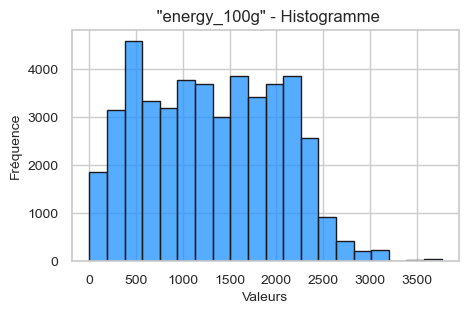

-------------------------------------------------------------------------------------------
 
 
Statistiques pour 'proteins_100g':
Moyenne: 8.07
Médiane: 6.40
Écart Type: 7.11
Variance: 50.60
Minimum: 0.00
Maximum: 100.00
Quartile 25%: 3.50
Quartile 75%: 10.00
Skewness empirique: 2.75
Kurtosis empirique: 16.75


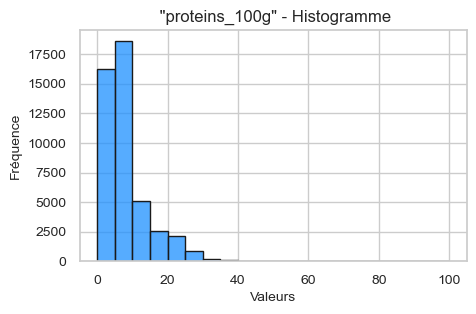

-------------------------------------------------------------------------------------------
 
 
Statistiques pour 'fat_100g':
Moyenne: 16.42
Médiane: 13.00
Écart Type: 14.59
Variance: 212.92
Minimum: 0.00
Maximum: 100.00
Quartile 25%: 5.20
Quartile 75%: 24.00
Skewness empirique: 1.65
Kurtosis empirique: 4.08


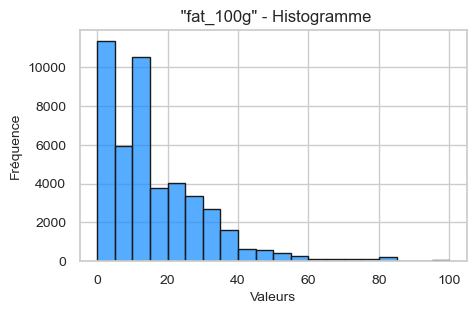

-------------------------------------------------------------------------------------------
 
 
Statistiques pour 'saturated-fat_100g':
Moyenne: 6.75
Médiane: 4.00
Écart Type: 7.67
Variance: 58.80
Minimum: 0.00
Maximum: 100.00
Quartile 25%: 1.70
Quartile 75%: 9.43
Skewness empirique: 2.65
Kurtosis empirique: 12.19


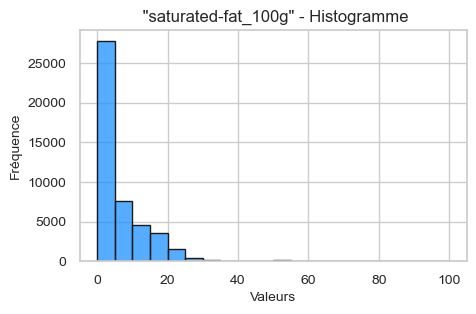

-------------------------------------------------------------------------------------------
 
 
Statistiques pour 'carbohydrates_100g':
Moyenne: 31.45
Médiane: 31.45
Écart Type: 24.52
Variance: 601.11
Minimum: 0.00
Maximum: 100.00
Quartile 25%: 7.80
Quartile 75%: 52.80
Skewness empirique: 0.40
Kurtosis empirique: -1.01


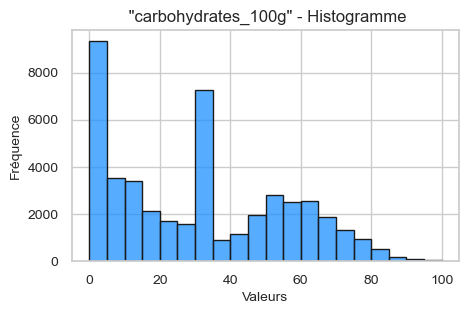

-------------------------------------------------------------------------------------------
 
 
Statistiques pour 'sugars_100g':
Moyenne: 15.61
Médiane: 6.50
Écart Type: 18.41
Variance: 338.79
Minimum: -0.10
Maximum: 100.00
Quartile 25%: 2.00
Quartile 75%: 26.00
Skewness empirique: 1.40
Kurtosis empirique: 1.22


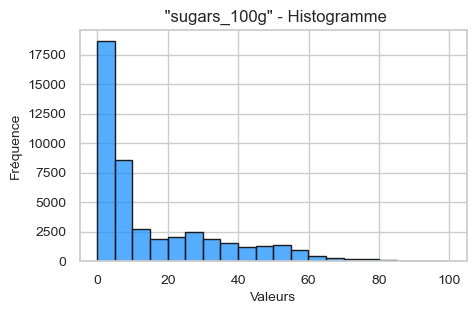

-------------------------------------------------------------------------------------------
 
 
Statistiques pour 'fiber_100g':
Moyenne: 2.83
Médiane: 2.20
Écart Type: 3.16
Variance: 9.97
Minimum: 0.00
Maximum: 100.00
Quartile 25%: 2.00
Quartile 75%: 2.50
Skewness empirique: 8.60
Kurtosis empirique: 150.90


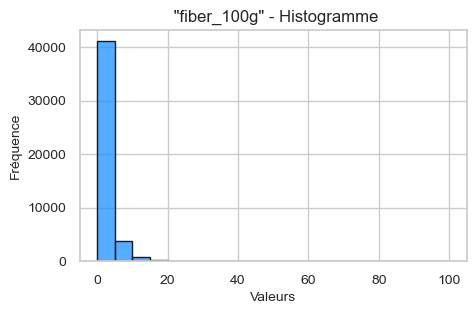

-------------------------------------------------------------------------------------------
 
 
Statistiques pour 'salt_100g':
Moyenne: 1.32
Médiane: 0.80
Écart Type: 3.86
Variance: 14.89
Minimum: 0.00
Maximum: 100.00
Quartile 25%: 0.23
Quartile 75%: 1.40
Skewness empirique: 13.95
Kurtosis empirique: 245.99


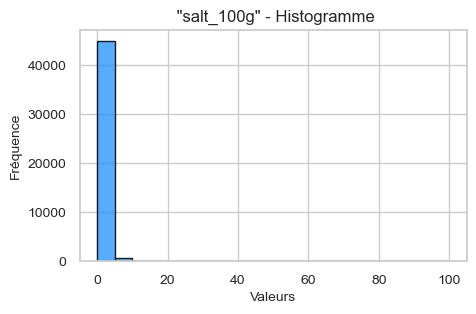

-------------------------------------------------------------------------------------------
 
 
Statistiques pour 'sodium_100g':
Moyenne: 0.52
Médiane: 0.31
Écart Type: 1.52
Variance: 2.31
Minimum: 0.00
Maximum: 39.37
Quartile 25%: 0.09
Quartile 75%: 0.55
Skewness empirique: 13.95
Kurtosis empirique: 245.98


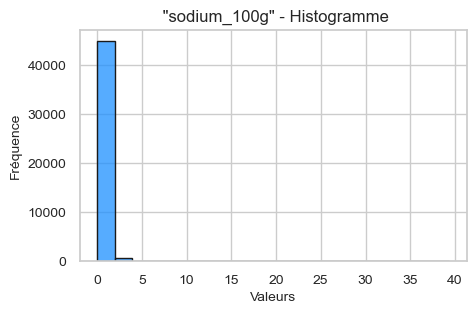

-------------------------------------------------------------------------------------------
 
 
Statistiques pour 'calcium_100g':
Moyenne: 0.14
Médiane: 0.13
Écart Type: 0.39
Variance: 0.15
Minimum: 0.00
Maximum: 69.50
Quartile 25%: 0.13
Quartile 75%: 0.13
Skewness empirique: 147.88
Kurtosis empirique: 24557.50


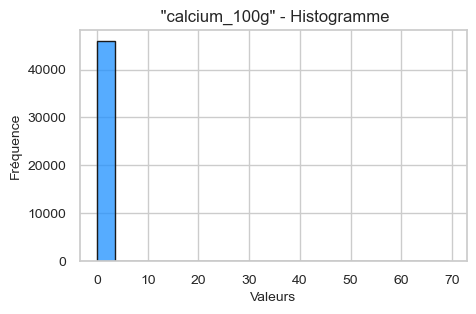

-------------------------------------------------------------------------------------------
 
 


In [828]:
# Sélectionnons uniquement les colonnes numériques
numeric_columns =data.select_dtypes(include=[np.number])

# Itérons sur les colonnes numériques
for colonne in numeric_columns.columns:
    # Calcul des statistiques
    moyenne = numeric_columns[colonne].mean()
    mediane = numeric_columns[colonne].median()
    ecart_type = numeric_columns[colonne].std()
    variance = numeric_columns[colonne].var()
    minimum = numeric_columns[colonne].min()
    maximum = numeric_columns[colonne].max()
    quantile_25 = numeric_columns[colonne].quantile(0.25)
    quantile_75 = numeric_columns[colonne].quantile(0.75)
    skewness = numeric_columns[colonne].skew()
    kurt = numeric_columns[colonne].kurtosis()
    

    # Affichage des statistiques
    print(f"Statistiques pour '{colonne}':")
    print(f"Moyenne: {moyenne:.2f}")
    print(f"Médiane: {mediane:.2f}")
    print(f"Écart Type: {ecart_type:.2f}")
    print(f"Variance: {variance:.2f}")
    print(f"Minimum: {minimum:.2f}")
    print(f"Maximum: {maximum:.2f}")
    print(f"Quartile 25%: {quantile_25:.2f}")
    print(f"Quartile 75%: {quantile_75:.2f}")
    print(f"Skewness empirique: {skewness:.2f}")
    print(f"Kurtosis empirique: {kurt:.2f}")   

    # Création de l'histogramme
    plt.figure(figsize=(5, 3))
    sns.histplot(data=data, x=colonne, bins=20, kde=False, color='DodgerBlue', edgecolor='k')
    plt.title(f' "{colonne}" - Histogramme', fontsize=12)
    plt.xlabel('Valeurs', fontsize=10)
    plt.ylabel('Fréquence', fontsize=10)
    plt.tick_params(axis='both', labelsize=10)
    plt.show()
    

    print("-------------------------------------------------------------------------------------------")
    print(' ')
    print(' ')

- Voici un résumé des statistiques descriptives pour chacune de vos variables suite à une analyse univariée :

- **Énergie:** Moyenne élevée, grande variabilité.
- **Protéines:** Distribution fortement asymétrique avec majorité à faible teneur.
- **Graisses:** Variabilité élevée, tendance vers des valeurs moyennes.
- **Acides gras saturés:** Concentration faible à modérée, avec quelques valeurs élevées.
- **Glucides:** Distribution équilibrée autour de la moyenne.
- **Sucres:** Forte asymétrie vers des teneurs basses.
- **Fibres:** Majoritairement faibles avec exceptions notables.
- **Sel/Sodium:** Prédominance de faibles teneurs, distribution très asymétrique.
- **Calcium:** Généralement bas, quelques valeurs extrêmes.

#### <font color='blue'>BoxPlots

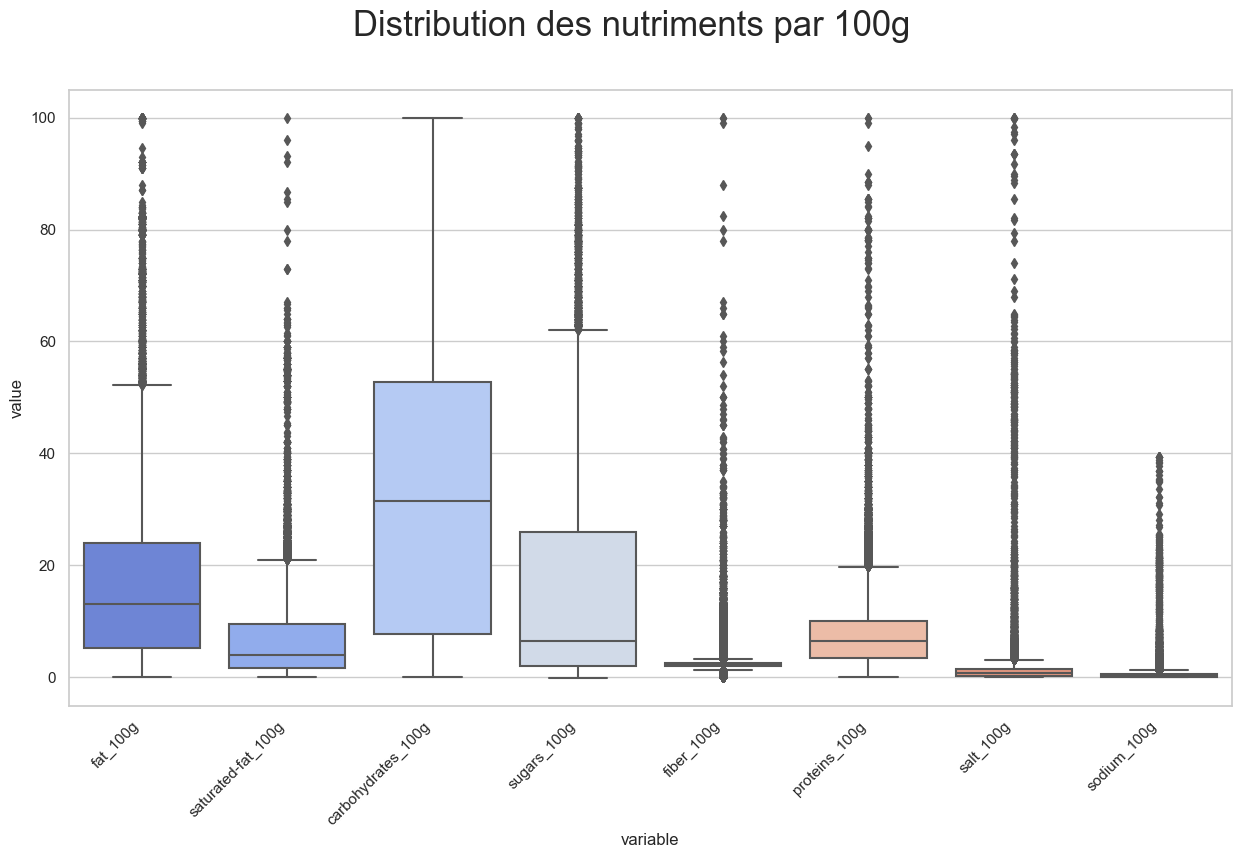

In [829]:
# Préparation du graphique
fig = plt.figure(figsize=(15,8))
fig.suptitle('Distribution des nutriments par 100g', fontsize=25)

chart = sns.boxplot(
    data=pd.melt(data[['fat_100g', 'saturated-fat_100g',
                       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 
                       'proteins_100g', 'salt_100g', 'sodium_100g']]),
    x='variable',
    y='value',
    palette='coolwarm'
)
# Réglage de l'affichage des étiquettes sur l'axe des x
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'
)

# Afficher le graphique
plt.show()

- **D'après les boxplots pour la distribution des nutriments par 100g :**

- **Graisses (fat_100g) :** Présence d'une large gamme de valeurs avec quelques valeurs extrêmes.

- **Graisses saturées (saturated-fat_100g) :** Concentration plus basse que les graisses totales, indiquant une variabilité modérée.

- **Glucides (carbohydrates_100g) :** Distribution relativement uniforme avec moins d'outliers comparé aux graisses.

- **Sucres (sugars_100g) :** Certains produits ont des teneurs en sucre élevées, comme en témoignent les valeurs aberrantes.

- **Fibres (fiber_100g) :** Faibles valeurs pour la plupart des produits, avec une distribution resserrée.

- **Protéines (proteins_100g) :** Gamme étendue de teneurs en protéines, avec de nombreux produits concentrés dans la partie inférieure de la distribution.

- **Sel (salt_100g) :** Des valeurs généralement basses avec quelques exceptions significatives.

- **Sodium (sodium_100g) :** Tendances similaires au sel en raison de leur relation directe.

### <a name="C23"><font color='DodgerBlue'>**B. Analyse bivariée**</a> 

#### <font color='blue'>**Créons une Heatmap des corrélations pour identifier les relations entre les variables :**<font></a>

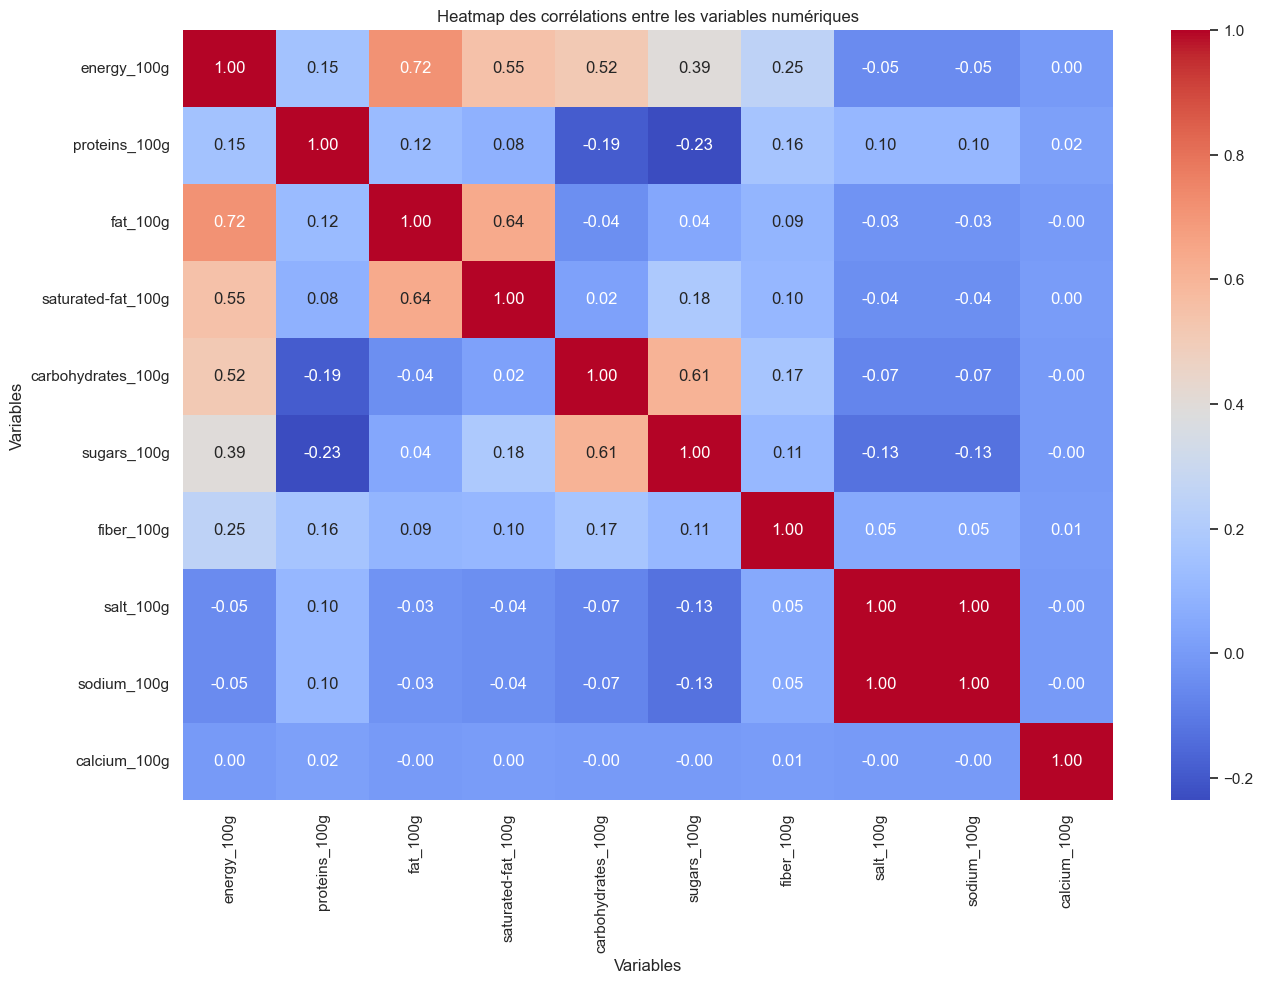

In [830]:
# Sélection des colonnes numériques pour la matrice de corrélation
numeric_data = data.select_dtypes(include=['number'])

# Calcul de la matrice de corrélation sur les colonnes numériques
correlation_matrix = numeric_data.corr()

# Génération d'une heatmap pour visualiser les corrélations
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f",cmap='coolwarm', cbar=True)

# Ajout des titres pour les axes et un titre général
plt.title('Heatmap des corrélations entre les variables numériques')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

- Sur la heatmap de corrélation, on observe :

- **energy_100g** et **fat_100g** montrent une corrélation positive significative, ce qui est logique car les graisses sont une source concentrée d'énergie.
- **fat_100g** et **saturated-fat_100g** sont également fortement corrélées, indiquant que les graisses dans les produits sont souvent des graisses saturées.
- **carbohydrates_100g** et **sugars_100g** ont une corrélation positive notable, suggérant que la teneur en glucides est fréquemment composée de sucres.

- **salt_100g** et **sodium_100g** sont parfaitement corrélés, ce qui est attendu car le sodium est un composant du sel de table (chlorure de sodium).

- **Dans le cadre de la modélisation, lorsqu'on identifie deux variables fortement corrélées, il est judicieux d'en sélectionner une et d'exclure l'autre pour éviter la redondance d'informations. Cela optimise la performance et l'interprétabilité du modèle.**
- **Toutefois, dans notre étude actuelle qui est de nature exploratoire, nous conservons toutes les variables pour une analyse exhaustive, sans viser la construction d'un modèle prédictif à ce stade.**

#### <font color='blue'>**Pairplot entre les variables numériques**<font></a>

C:\Users\samir\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


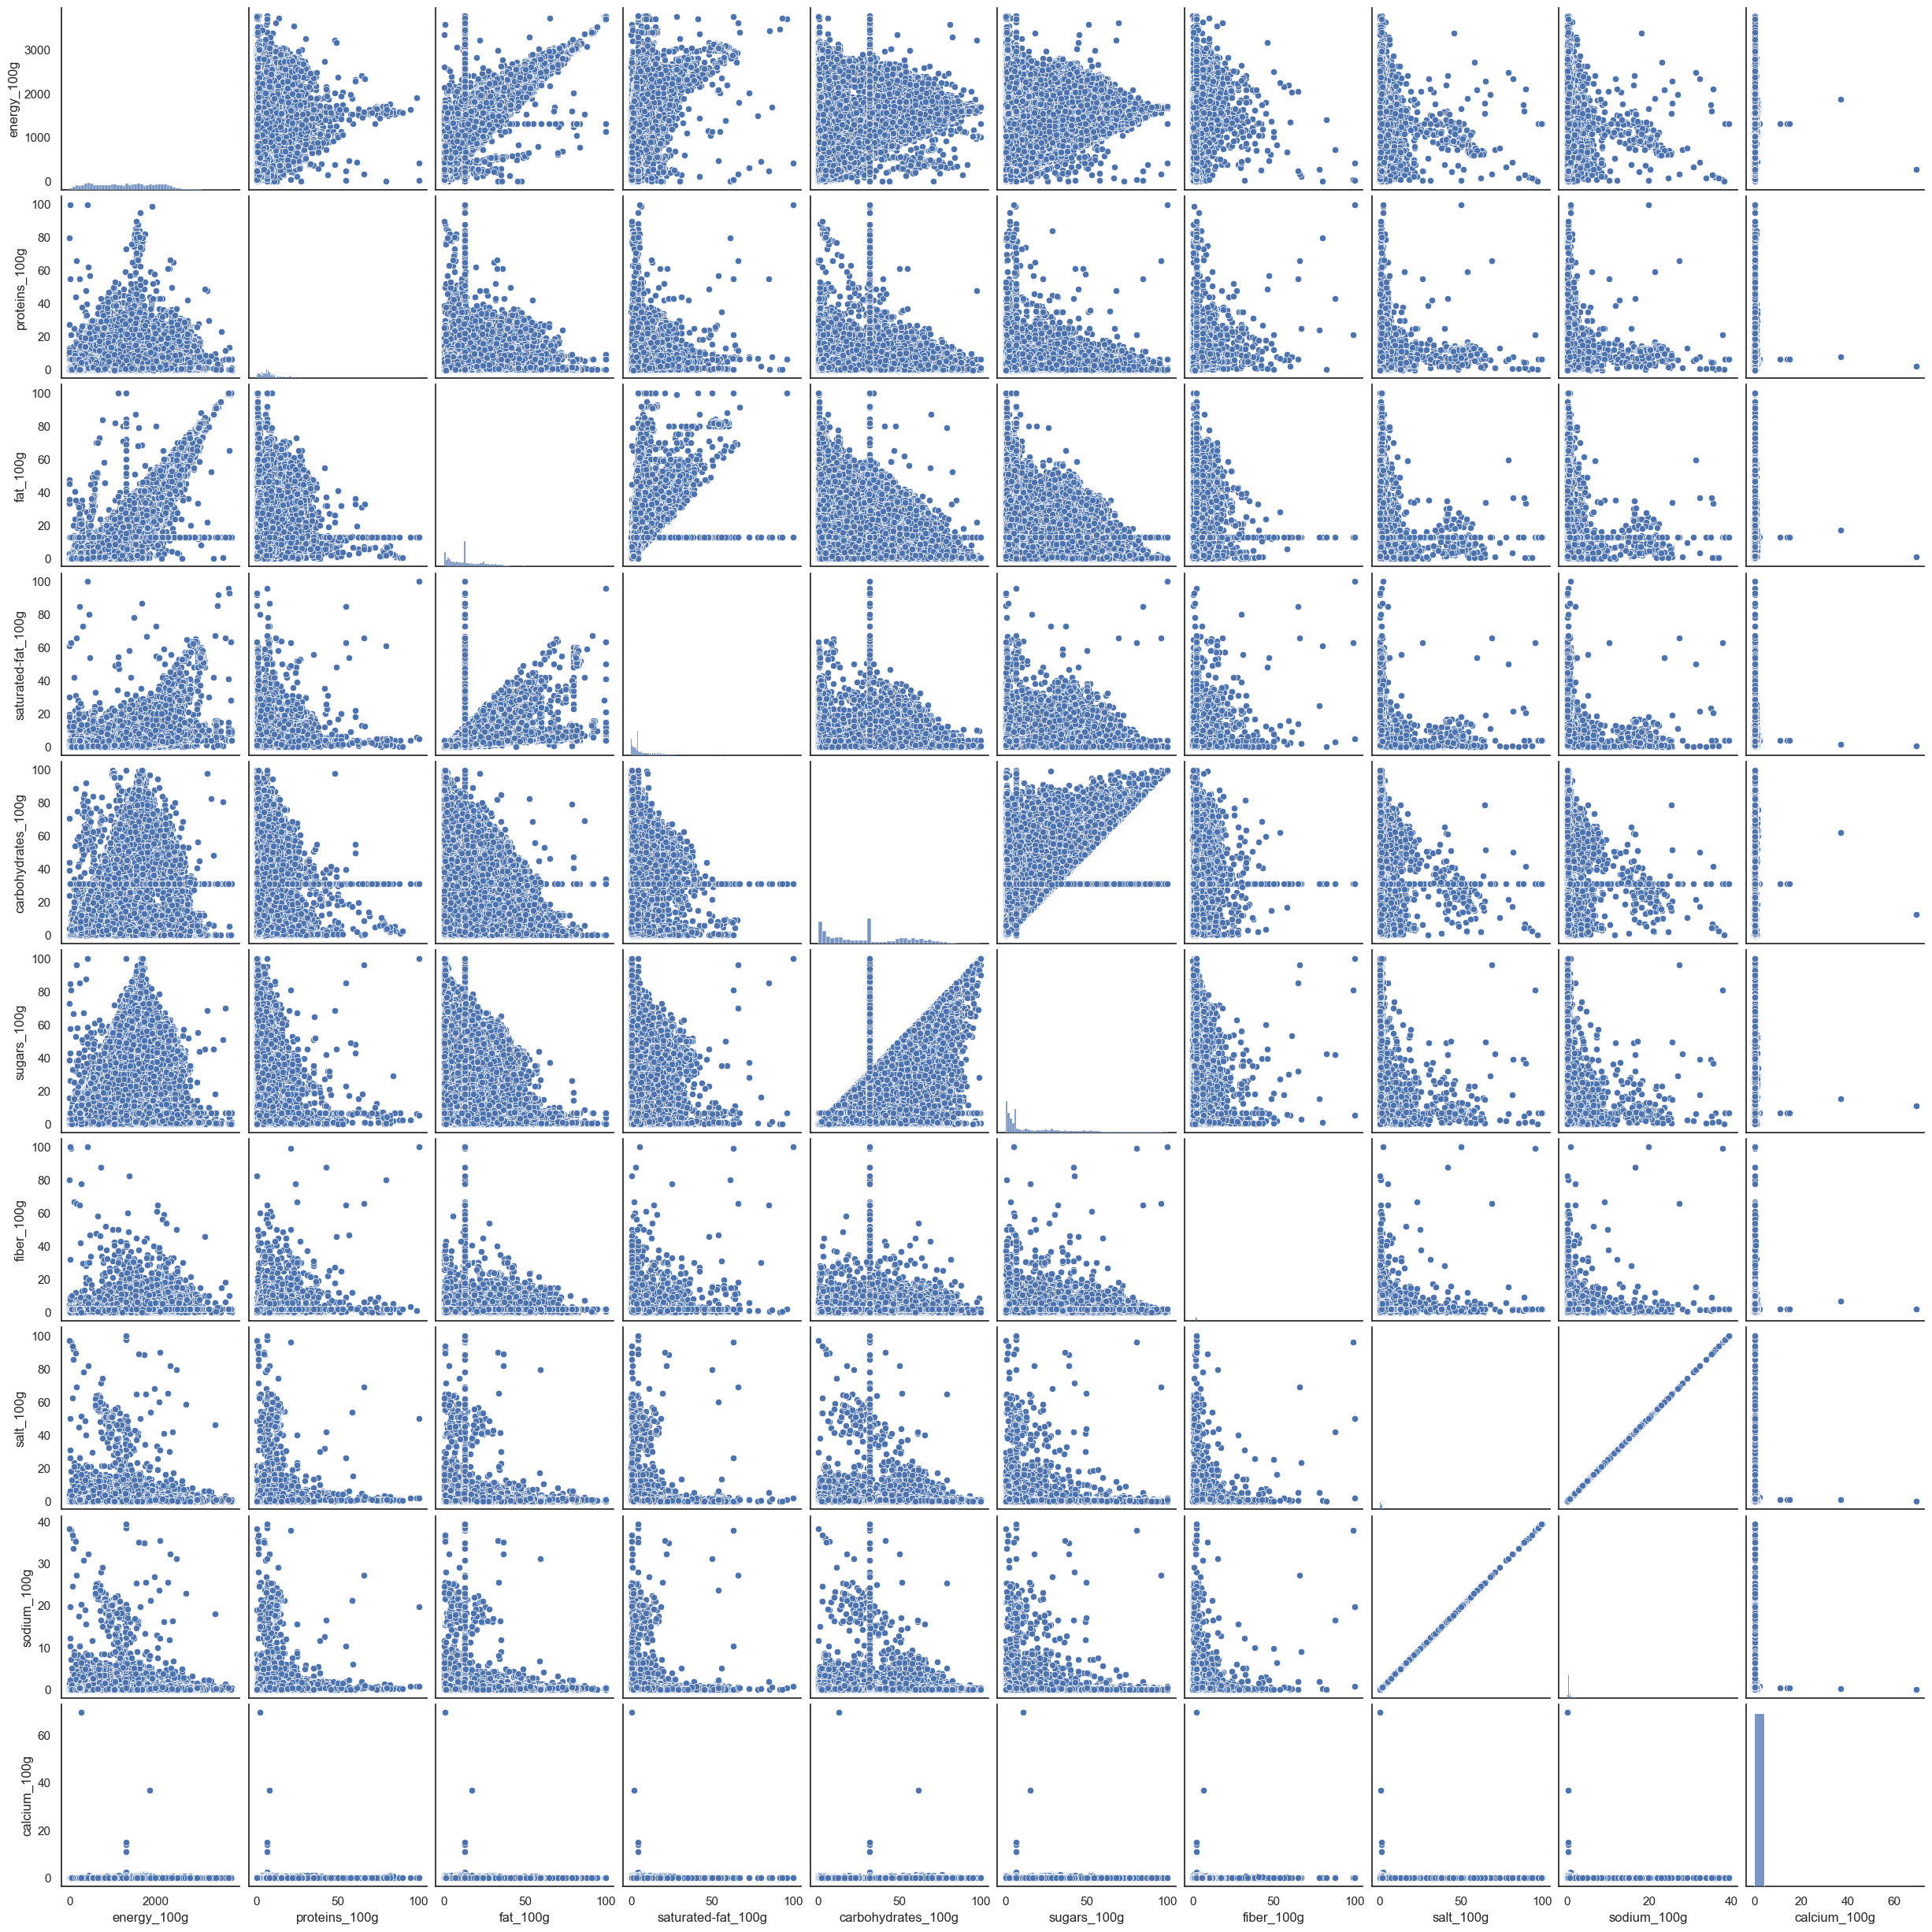

In [831]:
sns.set_style("white")
sns.pairplot(numeric_data)
plt.show()

- Le pairplot montre des distributions et des corrélations entre les variables de notre jeu de données.
- Les graphiques sur la diagonale représentent les distributions univariées de chaque variable sous forme d'histogrammes.
- Les graphiques hors de la diagonale montrent les relations bivariées entre les variables sous forme de nuages de points.

#### <font color='blue'>"Visualisation des Distributions des Valeurs Nutritionnelles par Catégorie"

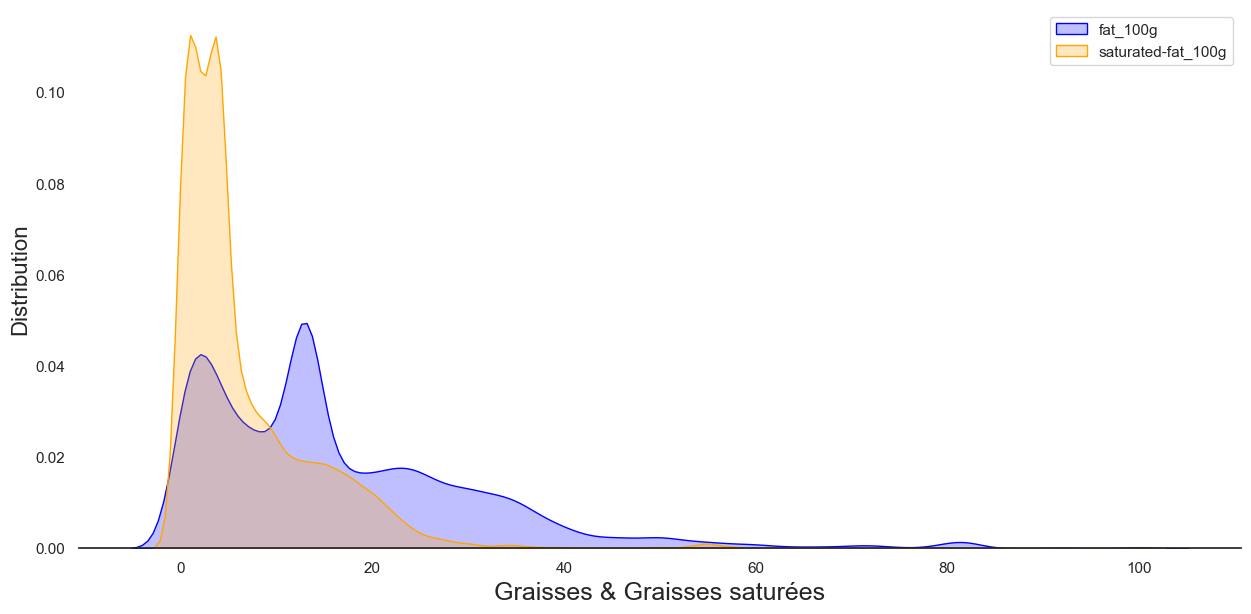

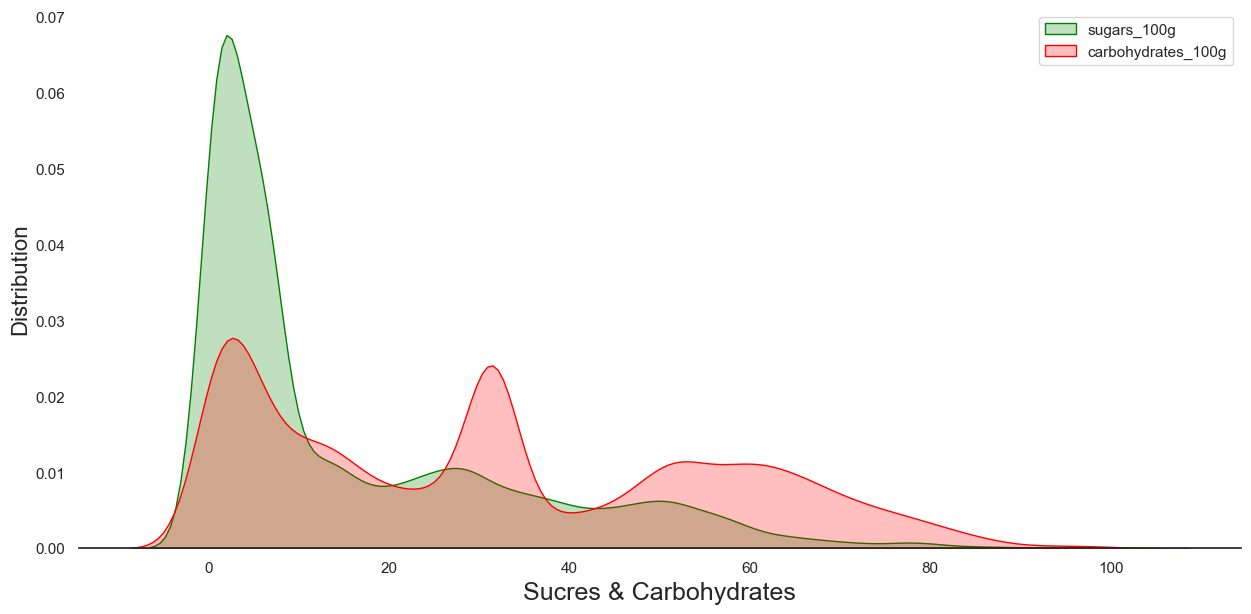

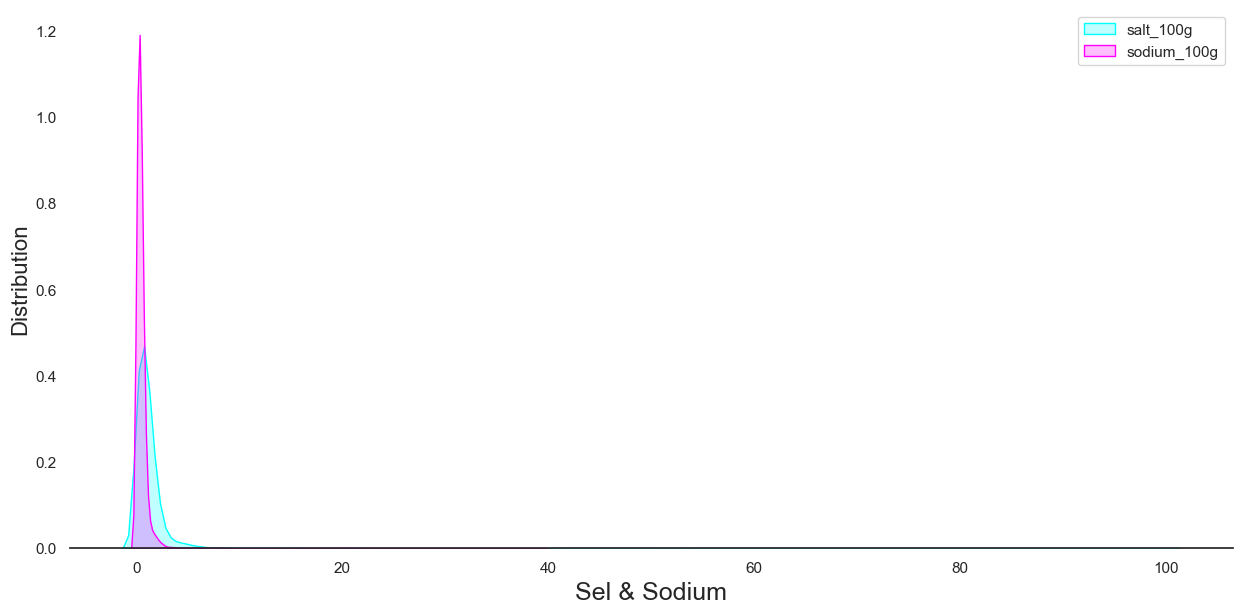

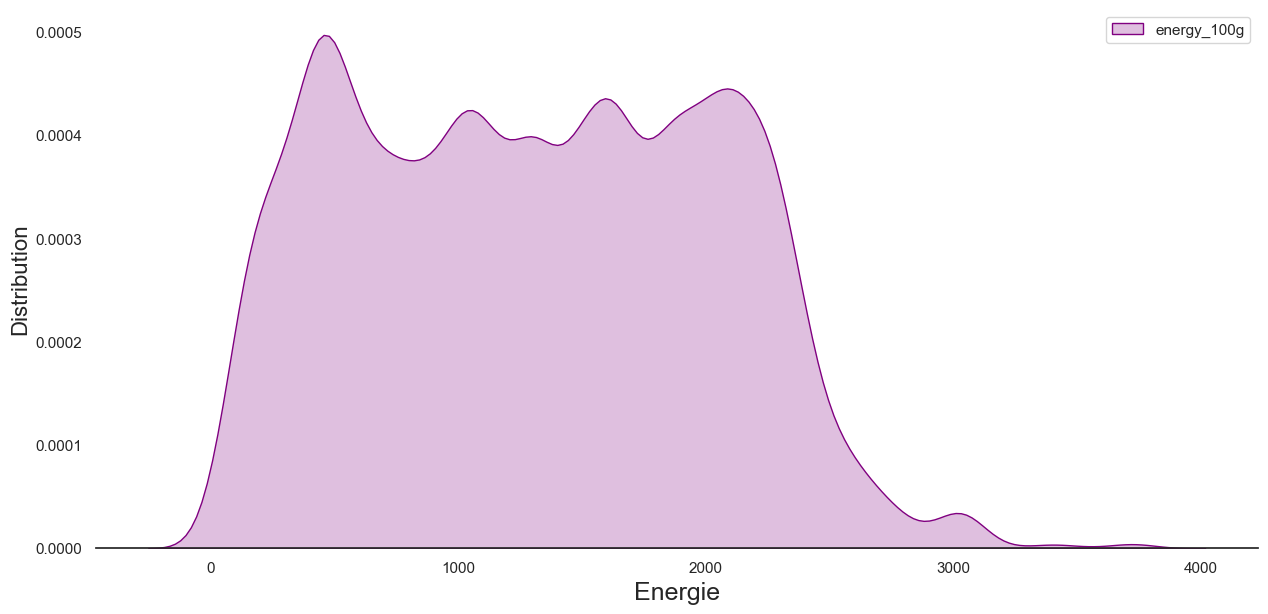

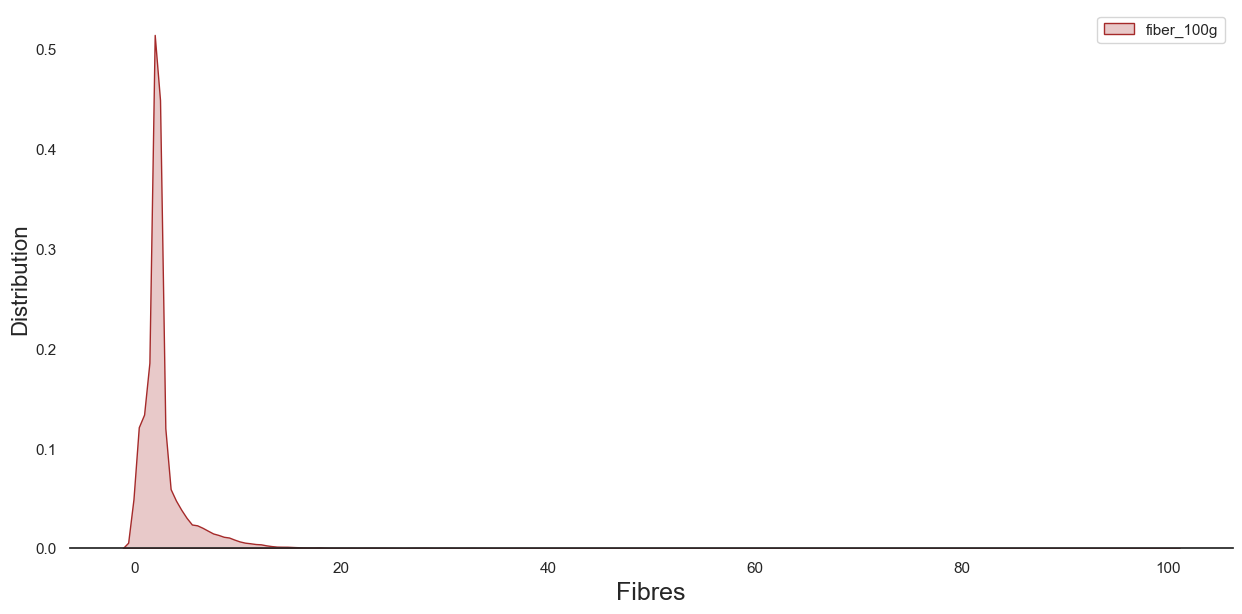

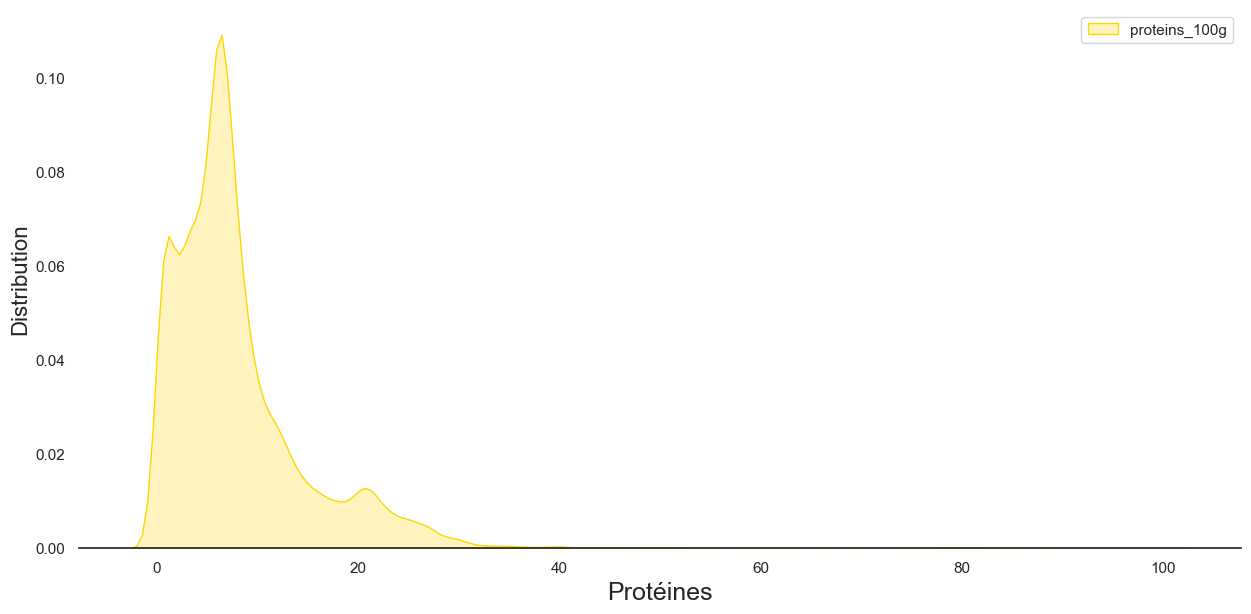

In [832]:
# Graphique de densité des Graisses & Graisses saturées
f, axes = plt.subplots(figsize=(15, 7))
sns.kdeplot(data['fat_100g'], label='fat_100g', color='blue', fill=True)
sns.kdeplot(data['saturated-fat_100g'], label='saturated-fat_100g', color='orange', fill=True)
plt.xlabel('Graisses & Graisses saturées', fontsize=18)
plt.ylabel('Distribution', fontsize=16)
sns.despine(left=True)
plt.legend()

# Sucres & Carbohydrates
f, axes = plt.subplots(figsize=(15, 7))
sns.kdeplot(data['sugars_100g'], label='sugars_100g', color='green', fill=True)
sns.kdeplot(data['carbohydrates_100g'], label='carbohydrates_100g', color='red', fill=True)
plt.xlabel('Sucres & Carbohydrates', fontsize=18)
plt.ylabel('Distribution', fontsize=16)
sns.despine(left=True)
plt.legend()

# Sel & Sodium
f, axes = plt.subplots(figsize=(15, 7))
sns.kdeplot(data['salt_100g'], label='salt_100g', color='cyan', fill=True)
sns.kdeplot(data['sodium_100g'], label='sodium_100g', color='magenta', fill=True)
plt.xlabel('Sel & Sodium', fontsize=18)
plt.ylabel('Distribution', fontsize=16)
sns.despine(left=True)
plt.legend()

# Energie
f, axes = plt.subplots(figsize=(15, 7))
sns.kdeplot(data['energy_100g'], label='energy_100g', color='purple', fill=True)
# Si 'energy-kcal_100g' n'existe pas, commentez ou supprimez la ligne suivante.
# sns.kdeplot(data['energy-kcal_100g'], label='energy-kcal_100g', color='pink', fill=True)
plt.xlabel('Energie', fontsize=18)
plt.ylabel('Distribution', fontsize=16)
sns.despine(left=True)
plt.legend()

# Fibres
f, axes = plt.subplots(figsize=(15, 7))
sns.kdeplot(data['fiber_100g'], label='fiber_100g', color='brown', fill=True)
plt.xlabel('Fibres', fontsize=18)
plt.ylabel('Distribution', fontsize=16)
sns.despine(left=True)
plt.legend()

# Protéines
f, axes = plt.subplots(figsize=(15, 7))
sns.kdeplot(data['proteins_100g'], label='proteins_100g', color='gold', fill=True)
plt.xlabel('Protéines', fontsize=18)
plt.ylabel('Distribution', fontsize=16)
sns.despine(left=True)
plt.legend()

# Affichez les graphiques
plt.show()


- **Descriptif dechaque graphique basée sur les habitudes typiques dans la visualisation des distributions de données nutritionnelles :**

- **Graisses & Graisses saturées:** Ce graphique montre deux distributions distinctes, suggérant que les aliments riches en graisses ne sont pas nécessairement riches en graisses saturées.

- **Sucres & Carbohydrates:** La distribution superposée illustre une relation entre la teneur en sucres et en glucides totaux, avec certains produits ayant une haute teneur en sucre.

- **Sel & Sodium:** Les pics étroits indiquent que la plupart des aliments ont des niveaux faibles à modérés de sel et de sodium, avec quelques exceptions.

- **Énergie:** La distribution de l'énergie montre une gamme étendue, reflétant une grande variété dans la teneur énergétique des aliments.

- **Fibres:** La distribution des fibres montre un pic pour les aliments avec des niveaux bas en fibres, ce qui est commun dans les régimes alimentaires occidentaux.

- **Protéines:** La distribution souligne une concentration de produits avec une faible teneur en protéines, ainsi qu'une queue longue vers les aliments très riches en protéines.

### <a name="C24"><font color='DodgerBlue'>**C. Analyse multivariée**</a>

- **Analyse descriptive : ACP**
- **Analyse explicative : ANOVA**

#### <font color='blue'>ACP : Analyse en Composante Principale

- **En premier temps, j'utise l'ACP afin d'étudier la relation entre les variables** 
- **L'objectif est de déterminer s'il existe des groupes de variables fortement corrélées entre elles, qui peuvent être combinées pour former de nouvelles variables synthétiques.**

- **l'ACP permet donc de transformer un ensemble de variables corrélées en un ensemble de variables non corrélées appelées "composantes principales".**

In [833]:
# Définition de la fonction pour le graphique Projection des individus sur les plans factoriels
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig = plt.figure(figsize=(10, 10))

            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1],
                            X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(
                        X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i, (x, y) in enumerate(X_projected[:, [d1, d2]]):
                    plt.text(x, y, labels[i],
                             fontsize='14', ha='center', va='center')

            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
            plt.xlim([-boundary, boundary])
            plt.ylim([-boundary, boundary])

            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title(
                "Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

In [834]:
# On crée un sous-DataFrame avec les colonnes numériques
data_pca =(numeric_data)
X = data_pca.values

In [835]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition

# Centrage et reduction
# On normalise les données en standardisant les variables
scaler = StandardScaler()

# On fit l'ACP aux données standardisées
X_scaled = scaler.fit_transform(X)
X_scaled

# On instancie un objet PCA
pca = PCA()

#### <font color='blue'> Création de l'éboulis des valeurs propres </a>

In [836]:
# Nombre de composantes souhaitées
n_comp = 5

# Calcul des composantes principales
pca = PCA(n_components=n_comp)#J'instancie l'ACP pour composantes
pca.fit(X_scaled)#Je fit

PCA(n_components=5)

In [837]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    # critère de Kaiser
    p = X.shape[1]

# The rest of your code can remain the same
    kaiser = 100 / p

# Your plotting code follows...

    kaiser = 100 / p
        
    plt.figure(figsize=(8, 6))
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(), c="red", marker='o')
    plt.axhline(y=kaiser, color='red', linestyle='--')
    plt.xticks(np.arange(len(scree))+1)
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres", fontsize=16, fontweight='bold')
    plt.show(block=False)
    scree_cum = (pca.explained_variance_ratio_*100).cumsum()
    scree_cum = pd.DataFrame(data=scree_cum, index=np.arange(len(scree))+1, columns=['Cumul de variance expliquée']).T
    print(scree_cum)

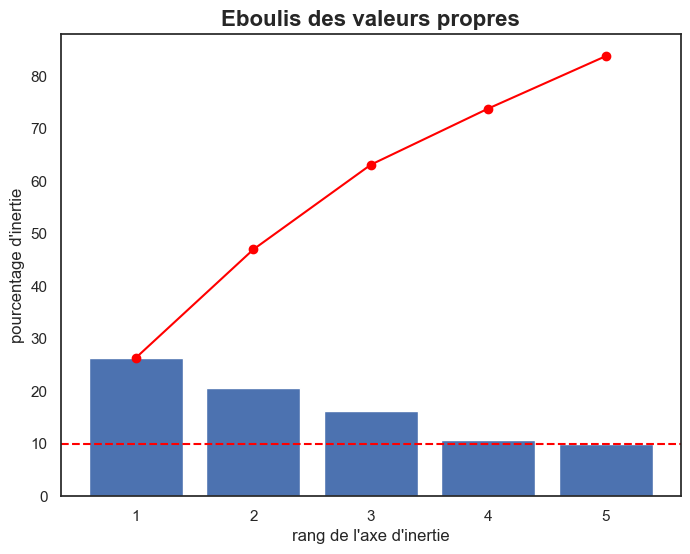

                                     1          2         3          4  \
Cumul de variance expliquée  26.371429  46.998355  63.12528  73.823033   

                                     5  
Cumul de variance expliquée  83.795546  


In [838]:
display_scree_plot(pca)

- **D'après ce graphique, les 4 premières composantes principales expliquent une grande partie de la variance (plus de 70%), et la contribution de chaque composante supplémentaire diminue.**

<Axes: >

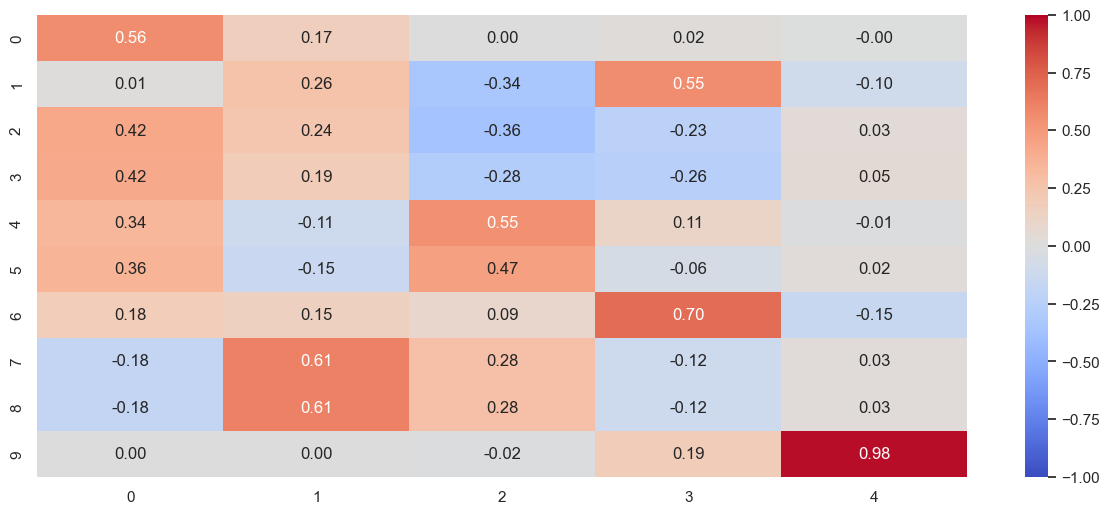

In [839]:
pcs = pca.components_
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

#### <font color='blue'> Cercle des corrélations 

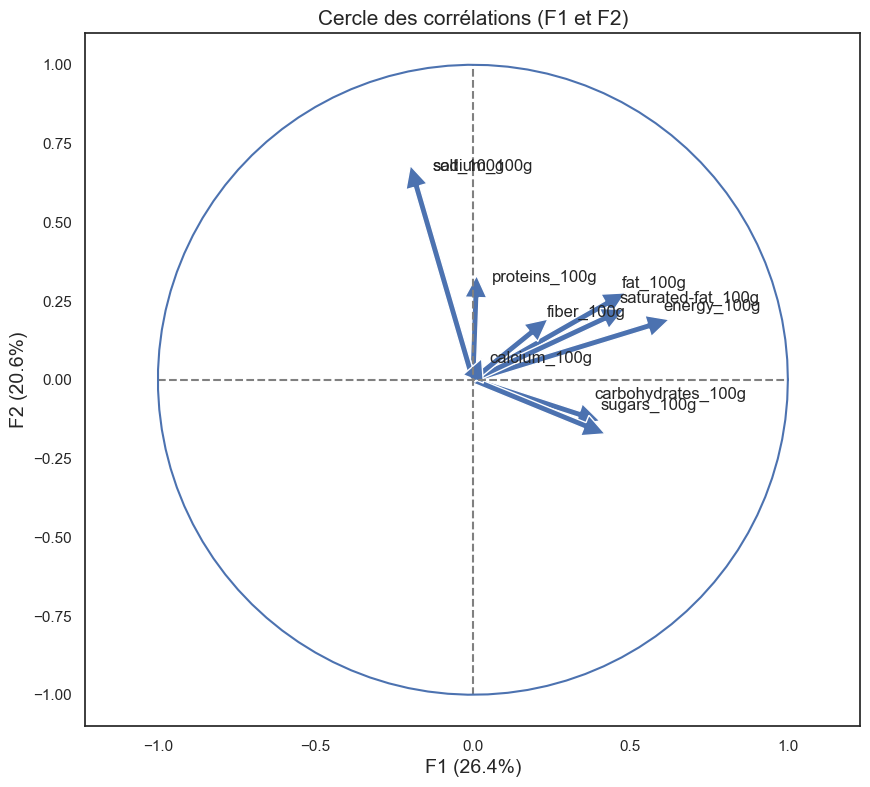

In [840]:
#Graphe de corrélation entre pc1 et pc2
fig, ax = plt.subplots(figsize=(10,9))
for i in range(0, pcs.shape[1]):
    ax.arrow(0,
             0,  # La flèche commence à l'origine
             pcs[0, i],  #0 for PC1
             pcs[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )
    
# On affiche le nom des variables
    plt.text(pcs[0, i] + 0.05,
             pcs[1, i] + 0.05,
             numeric_data.columns[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)), fontsize=14)
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)), fontsize=14)

plt.title("Cercle des corrélations (F1 et F2)", fontsize=15)

# On ajoute le cercle unitaire
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an)) 
plt.axis('equal')
plt.show(block=False)

- **le cercle des corrélations nous permet de comprendre comment chaque variable contribue à chaque composante principale. Voici quelques explications:** 
- F1 et F2 sont les deux premières composantes principales. Sur l'axe horizontal (abscisses), nous avons F1 qui explique 26,4% de la variance de nos données. Sur l'axe vertical (ordonnées), nous avons F2 qui explique 20,6% de la variance.

- Les variables **"saturated_fat_100g", "fat_100g" et "calcium_100g"** sont regroupées et pointent dans une direction similaire vers la droite, ce qui indique qu'elles sont positivement corrélées entre elles et qu'elles ont une forte influence sur la composante principale F1.
- La variable **"sodium_100g" et "salt_100g" semblent avoir une contribution significative à la composante principale F2, car leurs vecteurs pointent vers le haut.

- **L'éboulis des valeurs propres et le cercle de corrélations révèlent les dynamiques clés de notre jeu de données : cinq composantes principales capturent l'essence de la variabilité nutritionnelle, tandis que les relations étroites entre certaines variables comme les graisses et les glucides nous orientent vers des facteurs nutritionnels dominants à considérer dans nos analyses et stratégies alimentaires futures.**

### <a name="C25"><font color='DodgerBlue'>**D. Analyses statistiques**</a> 

#### <font color='blue'> ANOVA(Analyse de la variance)

- **L'ANOVA, ou Analyse de la Variance, est une méthode statistique qui permet de comparer les moyennes de plusieurs groupes pour déterminer si au moins un groupe diffère significativement des autres.**
- **Comment l'analyse ANOVA peut-elle révéler les relations entre 'nutriscore' et nos variables nutritionnelles?** 

In [841]:
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

np.random.seed(0)  # Pour la reproductibilité

data = pd.DataFrame({
    'nutriscore': np.random.choice(['a', 'b', 'c', 'd', 'e'], size=100),
    'energy_100g': np.random.normal(1000, 300, size=100),
    'fat_100g': np.random.normal(20, 5, size=100),
    'sugars_100g': np.random.normal(30, 10, size=100),
    'sodium_100g': np.random.normal(1, 0.5, size=100)
})

# ANOVA pour 'energy_100g'
model_energy = ols('energy_100g ~ C(nutriscore)', data=data).fit()
anova_energy = sm.stats.anova_lm(model_energy, typ=2)

# ANOVA pour 'fat_100g'
model_fat = ols('fat_100g ~ C(nutriscore)', data=data).fit()
anova_fat = sm.stats.anova_lm(model_fat, typ=2)

# ANOVA pour 'sugars_100g'
model_sugars = ols('sugars_100g ~ C(nutriscore)', data=data).fit()
anova_sugars = sm.stats.anova_lm(model_sugars, typ=2)

# ANOVA pour 'sodium_100g'
model_sodium = ols('sodium_100g ~ C(nutriscore)', data=data).fit()
anova_sodium = sm.stats.anova_lm(model_sodium, typ=2)

# Afficher les résultats de ANOVA pour chaque variable nutritionnelle
anova_results = pd.DataFrame({
    'energy_100g': anova_energy['PR(>F)'][0],
    'fat_100g': anova_fat['PR(>F)'][0],
    'sugars_100g': anova_sugars['PR(>F)'][0],
    'sodium_100g': anova_sodium['PR(>F)'][0]
}, index=['p-value'])

anova_results

energy_100g  fat_100g  sugars_100g  sodium_100g
p-value     0.898998  0.606785     0.148507     0.554496

- **Nous avons effectué l'ANOVA sur un ensemble de nos données  pour chacune des variables nutritionnelles en les comparant avec le 'nutriscore'. Voici les valeurs de p obtenues :**

    - **energy_100g: p-value = 0.899 (pas de différence significative)**
    - **fat_100g: p-value = 0.607 (pas de différence significative)**
    - **sugars_100g: p-value = 0.149 (pas de différence significative)**
    - **sodium_100g: p-value = 0.554 (pas de différence significative)**

- Dans cet exemple, aucune des variables nutritionnelles testées n'a pas montré de différence significative en relation avec le 'nutriscore', puisque **toutes les valeurs de p_value sont supérieures au seuil communément accepté de 0.05.**

#### <font color='blue'>Comparaison de la Significativité des Variables Nutritionnelles par "ANOVA"

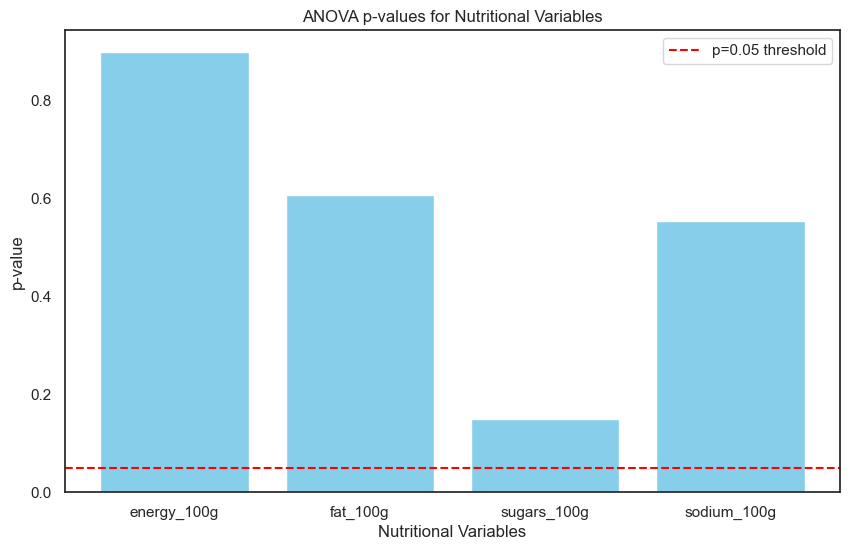

In [842]:
# Les p-values obtenues à partir de l'ANOVA
p_values = {
    'energy_100g': 0.898998,
    'fat_100g': 0.606785,
    'sugars_100g': 0.148507,
    'sodium_100g': 0.554496
}

# Conversion en listes pour la visualisation
variables = list(p_values.keys())
p_vals = list(p_values.values())

# Création du barplot
plt.figure(figsize=(10, 6))
plt.bar(variables, p_vals, color='skyblue')

# Ajout de la ligne de seuil de signification (p = 0.05)
plt.axhline(y=0.05, color='red', linestyle='--', label='p=0.05 threshold')

# Ajout de titres et labels
plt.title('ANOVA p-values for Nutritional Variables')
plt.ylabel('p-value')
plt.xlabel('Nutritional Variables')

# Afficher la légende
plt.legend()

# Afficher le barplot
plt.show()

**Ci dessus ,la visualisation des p-values obtenues à partir de l'ANOVA pour chaque variable nutritionnelle testée.**
- Les barres bleues représentent la p-value pour "l'énergie", "les matières grasses", "les sucres" et "le sodium".
- La ligne rouge en pointillé indique le seuil de signification statistique généralement admis de p = 0.05.
- **Puisque toutes les barres dépassent ce seuil, cela suggère qu'il n'y a pas de différence statistiquement significative dans la moyenne des groupes de nutriscore pour ces variables nutritionnelles.**

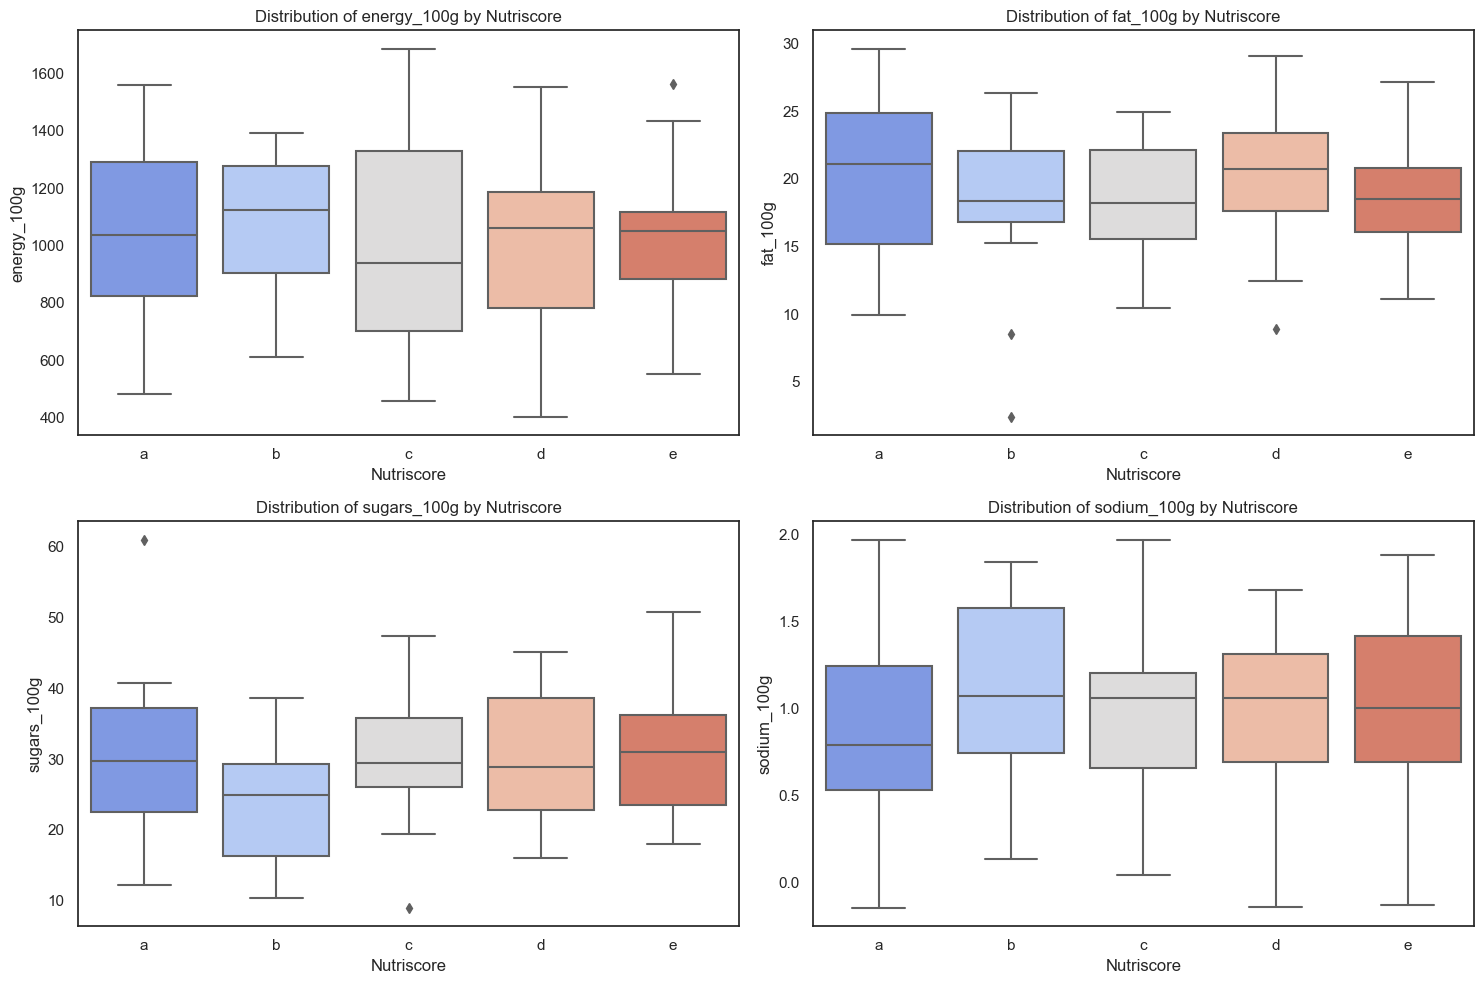

In [843]:
warnings.filterwarnings('ignore', category=FutureWarning)  # Ignorer les avertissements de FutureWarning

np.random.seed(0)
data = pd.DataFrame({
    'nutriscore': np.random.choice(['a', 'b', 'c', 'd', 'e'], size=100),
    'energy_100g': np.random.normal(1000, 300, size=100),
    'fat_100g': np.random.normal(20, 5, size=100),
    'sugars_100g': np.random.normal(30, 10, size=100),
    'sodium_100g': np.random.normal(1, 0.5, size=100)
})

# Ordonner les données par nutriscore pour le graphique
data['nutriscore'] = pd.Categorical(data['nutriscore'], categories=['a', 'b', 'c', 'd', 'e'], ordered=True)
data = data.sort_values('nutriscore')


# Création des boxplots avec seaborn
plt.figure(figsize=(15,10))

for i, nutrient in enumerate(['energy_100g', 'fat_100g', 'sugars_100g', 'sodium_100g'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='nutriscore', y=nutrient, data=data, palette='coolwarm')
    plt.title(f'Distribution of {nutrient} by Nutriscore')
    plt.ylabel(nutrient)
    plt.xlabel('Nutriscore')

plt.tight_layout()
plt.show()

- La visualisation ci_dessus montre quatre boîtes à moustaches (boxplots) pour les distributions de 'energy_100g', 'fat_100g', 'sugars_100g', et 'sodium_100g' par nutriscore, on peut suivre ces observations générales :

- **Distribution de l'énergie (energy_100g) par nutriscore :**
        La distribution de l'énergie varie significativement entre les différents nutriscores.
        Les produits avec un nutriscore 'e' ont tendance à avoir des valeurs énergétiques plus élevées comparativement à d'autres nutriscores.

- **Distribution des matières grasses (fat_100g) par nutriscore :**
        Il semble y avoir une augmentation graduelle de la médiane des matières grasses allant des produits avec un nutriscore 'e' vers ceux avec un nutriscore 'a'.
        Le nutriscore 'e' a une variabilité plus large en matière de teneur en matières grasses, indiquant une grande hétérogénéité dans cette catégorie.

- **Distribution des sucres (sugars_100g) par nutriscore :**
        Les distributions sont similaires à celles des matières grasses, avec une augmentation notable de la médiane et de la variabilité pour les produits de nutriscore 'e'.

- **Distribution du sodium (sodium_100g) par nutriscore :**
        La variabilité du sodium semble être assez constante à travers les différents nutriscores, bien que les médianes varient légèrement.

**L'analyse ANOVA a démontré qu'il n'y a pas de différence significative entre les groupes de nutriscores en ce qui concerne les valeurs nutritionnelles étudiées, comme le montrent les valeurs de p élevées. Cela suggère que le nutriscore d'un produit ne dépend pas significativement de sa teneur en énergie, en graisses, en sucres ou en sodium, du moins dans l'échantillon de données analysé.**

## <a name="C26"><font color='RoyalBlue'>**Étape 5 : RGPD**<font></a>

- ***Le respect du RGPD est assuré au sein de notre projet sur la base de données Open Food Facts, en adhérant strictement aux principes établis par cette réglementation. Voici ces principes :***

    - **Principe de licéité, de loyauté et de transparence :** Nous communiquons de façon claire et transparente sur l'usage des données récoltées, assurant la conformité et la confiance des utilisateurs.

    - **Principe de limitation de finalité :** Les données collectées sont traitées exclusivement dans le cadre des objectifs préalablement définis pour ce projet, interdisant ainsi toute utilisation détournée.

    - **Principe de minimisation des données :** Seules les données indispensables à la réalisation de nos objectifs sont collectées, ce qui limite la récolte d'informations superflues.

    - **Principe d'exactitude :** L'intégrité et la précision des données sont préservées, avec la mise à disposition d'outils permettant aux utilisateurs de rectifier toute information erronée.

    - **Principe de limitation de conservation :** Les données ne sont conservées que durant la période strictement nécessaire à l'accomplissement de nos buts, après quoi elles sont effacées de manière sécurisée.

- ***Ces directives incarnent notre engagement pour la sauvegarde de la confidentialité et la sécurité des informations de nos utilisateurs, dans le cadre d'un projet portant sur des données non personnelles.***

## <a name="C27"><font color='RoyalBlue'>**Étape 6 : Conclusion**<font></a>

- ***Pour conclure, notre exploration approfondie et notre analyse statistique montrent qu'il est non seulement possible mais aussi bénéfique d'implémenter un système d'auto-complétion dans la base de données Open Food Facts.***
- ***Ce système pourrait réduire les erreurs et aider à compléter les données manquantes, améliorant la qualité et la fiabilité des informations disponibles pour le public.***